# T-DAB Challenge: Marine Electronics Company

## Part I ) Exploratory Data Analysis

### Your first task is to analyse the data, give the client some feedback on data collection, cleaning and handling process.

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style 
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
import datetime as dt

In [2]:
%%capture
# Install relevant packages
!pip install missingno
import missingno as msno

In [3]:
# Importing labeled data 
data_raw= pd.read_csv('./data/test_data.csv', header = 0)
# Check raw data variable information: rows, columns, non-nulls, dtypes
data_raw.info()
# data_raw.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CurrentSpeed  219833 non-null  float64
 1   CurrentDir    219832 non-null  float64
 2   TWS           219837 non-null  float64
 3   TWA           219833 non-null  float64
 4   AWS           219834 non-null  float64
 5   AWA           219838 non-null  float64
 6   Roll          219833 non-null  float64
 7   Pitch         219836 non-null  float64
 8   HeadingMag    219835 non-null  float64
 9   HoG           219838 non-null  float64
 10  HeadingTrue   219837 non-null  float64
 11  AirTemp       219840 non-null  float64
 12  Longitude     219836 non-null  float64
 13  Latitude      219840 non-null  float64
 14  SoG           219842 non-null  float64
 15  SoS           219840 non-null  float64
 16  AvgSoS        219838 non-null  float64
 17  VMG           219837 non-null  float64
 18  Rudd

In [4]:
# Importing features' descriptions
var_dict = pd.read_json('./data/data_dict.json')
var_dict.transpose().sort_values('units')

name             units     range  \
TensPilote  VoltageDrawn             Volts      None   
Longitude      Longitude           degrees  [0, 360]   
Barre          RudderAng           degrees      None   
Latitude        Latitude           degrees  [0, 360]   
Derive            Leeway           degrees      None   
Route        HeadingTrue           degrees      None   
CapFond              HoG           degrees      None   
CapMagPil     HeadingMag           degrees      None   
3DH_Roulis          Roll           degrees      None   
AngVentApp           AWA           degrees      None   
DirVentFnd           TWD           degrees      None   
AngVentRl            TWA           degrees      None   
DirCourMes    CurrentDir           degrees      None   
3DH_Tang           Pitch           degrees      None   
TempAir          AirTemp   degrees Celcius      None   
VMG                  VMG             knots      None   
VitVentFnd          WSoG             knots      None   
VitSurfMoy        AvgSoS             knots      None   
VitCourMes  CurrentSpeed             knots      None   
VitFond              SoG             knots      None   
VitVentApp           AWS             knots      None   
VitVentRl            TWS             knots      None   
VitesSurf            SoS             knots      None   
LatDecMin      LatDecMin  minutes of angle             
LonDecMin      LonDecMin  minutes of angle             
ModePilote    ModePilote           unclear   unclear   

                                                  description  
TensPilote    Voltage drawn by the system of one of its parts  
Longitude                             Longitudinal coordinate  
Barre                                            Rudder angle  
Latitude                               Latitudinal coordinate  
Derive                                                         
Route       true heading. True heading - heading over grou...  
CapFond                                   heading over ground  
CapMagPil                                    magnetic heading  
3DH_Roulis                         Roll, also equals to -Heel  
AngVentApp                                Apparent Wind Angle  
DirVentFnd                                True wind direction  
AngVentRl                                     True Wind Angle  
DirCourMes                                                     
3DH_Tang                                          Pitch angle  
TempAir                                       air temperature  
VMG         Velocity made good. Calculated as Speed over s...  
VitVentFnd                             Wind speed over ground  
VitSurfMoy                         Average speed over surface  
VitCourMes                                                     
VitFond                                     Speed over ground  
VitVentApp                                Apparent Wind Speed  
VitVentRl                                     True Wind Speed  
VitesSurf                                  Speed over surface  
LatDecMin                    Decimals of the latitude minutes  
LonDecMin                   Decimals of the longitude minutes  
ModePilote                                            unclear

In [5]:
# Check first rows of our data 
data_raw.head(100).transpose()

0                        1   \
CurrentSpeed                   0.0756                   0.0756   
CurrentDir                        123                      123   
TWS                              10.8                     10.8   
TWA                                48                       48   
AWS                              10.4                     10.4   
AWA                                48                       48   
Roll                            -3.54                    -3.54   
Pitch                            9.08                     9.08   
HeadingMag                         24                       24   
HoG                               308                      308   
HeadingTrue                         9                        9   
AirTemp                       27.7177                  27.7177   
Longitude                    -61.7393                 -61.7393   
Latitude                       12.011                   12.011   
SoG                            0.0864                   0.0864   
SoS                                 0                        0   
AvgSoS                         0.0864                   0.0864   
VMG                            0.0594                   0.0594   
RudderAng                     4.66667                  4.66667   
Leeway                              0                        0   
TWD                               356                      356   
WSoG                             10.5                     10.5   
VoltageDrawn                     11.8                     11.8   
ModePilote                          5                        5   
DateTime      2019-04-14 00:00:00.000  2019-04-14 00:00:01.000   
Yaw                              -299                     -299   
Tacking                             1                        1   

                                   2                        3   \
CurrentSpeed                   0.0756                   0.0756   
CurrentDir                        123                      123   
TWS                              10.8                     10.8   
TWA                                48                       48   
AWS                              10.4                     10.4   
AWA                                48                       48   
Roll                            -3.52                    -3.52   
Pitch                             9.1                      9.1   
HeadingMag                         24                       24   
HoG                               308                      308   
HeadingTrue                         9                        9   
AirTemp                       27.7177                  27.7177   
Longitude                    -61.7393                 -61.7393   
Latitude                       12.011                   12.011   
SoG                            0.0864                   0.0864   
SoS                                 0                        0   
AvgSoS                         0.0864                   0.0864   
VMG                            0.0594                   0.0594   
RudderAng                     4.66667                  4.66667   
Leeway                              0                        0   
TWD                               356                      356   
WSoG                              9.9                      9.9   
VoltageDrawn                     11.8                     11.8   
ModePilote                          5                        5   
DateTime      2019-04-14 00:00:02.000  2019-04-14 00:00:03.000   
Yaw                              -299                     -299   
Tacking                             1                        1   

                                   4                        5   \
CurrentSpeed                   0.0756                   0.0756   
CurrentDir                        123                      123   
TWS                              10.8                     10.8   
TWA                                48                       48   
AWS    

In [6]:
# Check last row
data_raw.tail(3)

CurrentSpeed  CurrentDir   TWS   TWA        AWS   AWA       Roll  \
219997        1.8576       100.0  14.5  60.0  20.299999  37.0 -17.660000   
219998        1.8522       103.0  15.2  57.0  22.100000  35.0 -18.559999   
219999        1.8090       104.0  14.9  57.0  21.400000  33.0 -17.039999   

        Pitch  HeadingMag   HoG  ...     VMG  RudderAng  Leeway   TWD  \
219997   2.48        24.0  17.0  ...  5.7186        8.0    -2.0  76.0   
219998   5.44        25.0  17.0  ...  5.7672       -4.0    -1.0  75.0   
219999   1.64        23.0  19.0  ...  7.1064        1.0    -1.0  75.0   

             WSoG  VoltageDrawn  ModePilote                 DateTime   Yaw  \
219997  17.900000          12.2         2.0  2019-04-16 07:33:17.000 -13.0   
219998  18.200001          12.2         2.0  2019-04-16 07:33:18.000  -9.0   
219999  14.100000          12.0         2.0  2019-04-16 07:33:19.000 -12.0   

        Tacking  
219997      0.0  
219998      0.0  
219999      0.0  

[3 rows x 27 columns]

In [7]:
# Get summary statistic of our data with our enhanced summary function
df = data_raw.copy()

# Cast dates into the right format
df['DateTime'] = pd.to_datetime(df['DateTime'])
assert df['DateTime'].dtype == 'datetime64[ns]'

### Handling Duplicates

In [8]:
# Get duplicated rows
duplicates = df.duplicated()

# Check duplicates
# df[duplicates]

# Count number of duplicated rows
print(duplicates.value_counts())

# Drop duplicates
df.drop_duplicates(keep = 'first', inplace = True)

False    200000
True      20000
dtype: int64


In [9]:
# Check df variable information: rows, columns, non-nulls, dtypes
df.info()
# Notice new shape
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CurrentSpeed  199834 non-null  float64       
 1   CurrentDir    199833 non-null  float64       
 2   TWS           199837 non-null  float64       
 3   TWA           199835 non-null  float64       
 4   AWS           199835 non-null  float64       
 5   AWA           199839 non-null  float64       
 6   Roll          199833 non-null  float64       
 7   Pitch         199837 non-null  float64       
 8   HeadingMag    199835 non-null  float64       
 9   HoG           199838 non-null  float64       
 10  HeadingTrue   199837 non-null  float64       
 11  AirTemp       199840 non-null  float64       
 12  Longitude     199838 non-null  float64       
 13  Latitude      199840 non-null  float64       
 14  SoG           199842 non-null  float64       
 15  SoS           199

(200000, 27)

In [10]:
def get_summary(input_data):
    # Get a whole bunch of stats
    output_data = input_data.describe().transpose()
    
    # Count NANs
    output_data['number_nan'] = input_data.shape[0] - output_data['count']
    
    # Count unique values
    output_data['number_distinct'] = input_data.apply(lambda x: len(pd.unique(x)), axis=0) 
    
    # Count unique values
    output_data['median'] = input_data.median()
    
    # Print DateTime information
    try:
        print(input_data['DateTime'].describe(datetime_is_numeric=True))
    except:
        pass
    
    return output_data

# Notice not more duplicated are present
duplicates2 = df.duplicated()
print("Number of current duplicated rows: {:1d}".format(df[duplicates2].shape[0]))

# Get summary of our DataFrame without duplicates
get_summary(df)

Number of current duplicated rows: 0
count                           199995
mean     2019-04-15 03:46:39.912676864
min                2019-04-14 00:00:00
25%         2019-04-14 13:53:19.500000
50%                2019-04-15 03:46:41
75%         2019-04-15 17:40:00.500000
max                2019-04-16 07:33:19
Name: DateTime, dtype: object


/Users/laureanonisenbaum/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == '':


count        mean         std         min        25%  \
CurrentSpeed  199834.0    1.063285    0.791870    0.016200   0.475200   
CurrentDir    199833.0  135.764749   69.140002    0.000000  96.000000   
TWS           199837.0   15.037132    3.585556    1.700000  12.800000   
TWA           199835.0   57.257262   23.197527 -179.000000  51.000000   
AWS           199835.0   20.024425    5.348277    2.800000  16.600000   
AWA           199839.0   39.552700   20.926651 -177.000000  33.000000   
Roll          199833.0  -14.891900    6.953152  -39.299999 -19.820000   
Pitch         199837.0    5.976148    2.702610   -7.880000   4.120000   
HeadingMag    199835.0   33.329652   47.798507    0.000000  19.000000   
HoG           199838.0   70.051156  115.469556    0.000000   9.000000   
HeadingTrue   199837.0   72.831082  129.900217    0.000000   6.000000   
AirTemp       199840.0   27.686601    1.862200   21.107229  26.328928   
Longitude     199838.0  -60.806134    0.935678  -61.816873 -61.678557   
Latitude      199840.0   16.300045    3.765055   11.971172  12.689490   
SoG           199842.0    7.605106    3.193982    0.005400   7.678800   
SoS           199841.0    7.554289    3.202682    0.000000   7.597800   
AvgSoS        199838.0    6.169172    2.961650    0.070200   5.049000   
VMG           199838.0    4.130190    2.120861    0.000000   3.175200   
RudderAng     199838.0    1.931818    4.810713  -37.333336  -1.000000   
Leeway        199839.0   -1.233013    0.808358  -10.000000  -2.000000   
TWD           199838.0   83.778015   55.432548    0.000000  61.000000   
WSoG          199836.0   15.034609    4.229641    0.000000  12.100000   
VoltageDrawn  199839.0   12.426544    0.572286   11.100000  12.100000   
ModePilote    199840.0    2.464907    1.085628    2.000000   2.000000   
Yaw           199835.0    2.782305  142.204955 -359.000000 -13.000000   
Tacking       199995.0    0.230201    0.420962    0.000000   0.000000   

                     50%         75%         max  number_nan  number_distinct  \
CurrentSpeed    0.864000    1.571400    5.697000       166.0              964   
CurrentDir    106.000000  149.000000  359.000000       167.0              361   
TWS            15.400000   17.600000   29.100000       163.0              276   
TWA            59.000000   63.000000  179.000000       165.0              350   
AWS            21.299999   23.900000   37.000000       165.0              337   
AWA            37.000000   42.000000  169.000000       161.0              295   
Roll          -16.260000  -11.080000   10.139999       167.0             1934   
Pitch           6.100000    8.420000   17.359999       163.0             1024   
HeadingMag     24.000000   31.000000  359.000000       165.0              316   
HoG            16.000000   32.000000  359.000000       162.0              361   
HeadingTrue    12.000000   31.000000  359.000000       163.0              311   
AirTemp        27.217728   29.273079   32.439430       160.0              206   
Longitude     -61.269763  -59.770697  -59.279375       162.0           148341   
Latitude       14.832097   20.254886   22.209945       160.0           171706   
SoG             8.758801    9.406800   12.598201       158.0             2084   
SoS             8.699400    9.396000   12.700800       159.0              129   
AvgSoS          7.468200    8.402400    8.532001       162.0             1420   
VMG             4.649400    5.648400    9.860400       162.0             1633   
RudderAng       2.333333    4.666667   47.000000       162.0              180   
Leeway         -1.000000   -1.000000    9.000000       161.0               18   
TWD            69.000000   81.000000  359.000000       162.0              361   
WSoG           15.100000   17.900000   35.700001       164.0              335   
VoltageDrawn   12.300000   12.500000   14.200000       161.0               33   
ModePilote      2.000000    2.000000    5.000000       160.0                3   
Yaw            -6.00

### Handling Missing Values (NaN)

In [11]:
# Check number of rows with NaN values
df_nan = df[df.isna().any(axis=1) >= 1]
df_nan.shape

(307, 27)

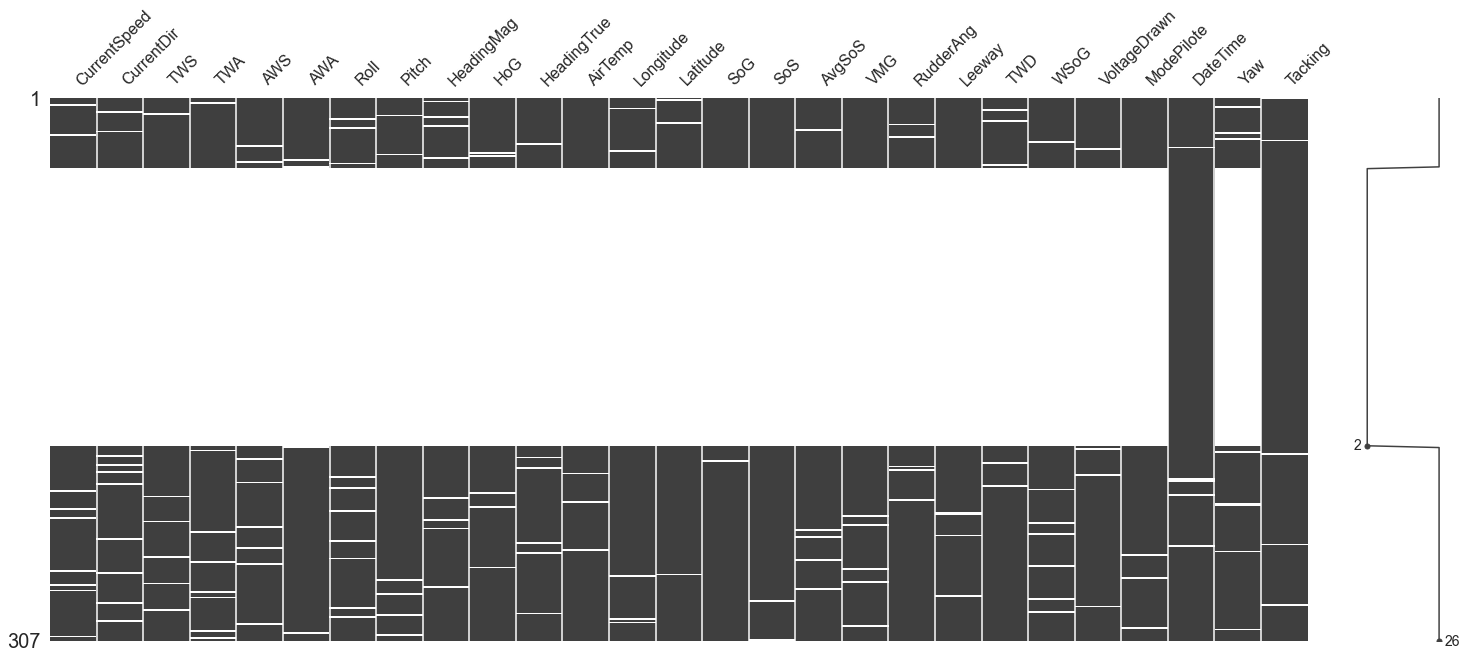

In [12]:
# Visualize distribution of missing values accross columns. Missing in white
msno.matrix(df_nan)
plt.show()

In [13]:
%%capture
# Exploring rows with missing values
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
df_nan[df.columns]

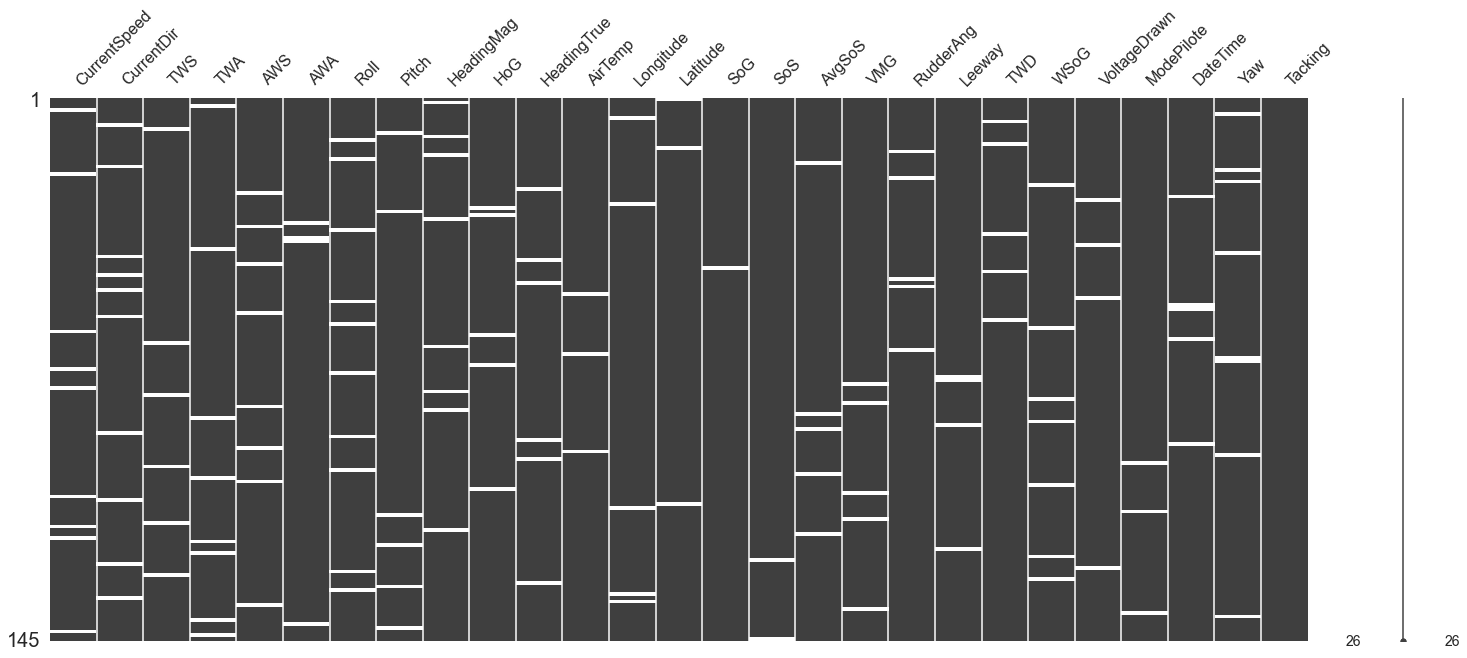

In [14]:
# Drop rows that were not correctly labeled
df.dropna(axis=0, how='any', subset=['Tacking'], inplace=True)

# Drop rows with more than half of the features missing
df.dropna(axis=0, thresh=len(df.columns)/2, inplace=True)

# Check newer missing value distribution
msno.matrix(df[df.isna().any(axis=1) >= 1])
plt.show()

In [15]:
# Get summary of our DataFrame without duplicates
print("Current shape of the DataFrame {}".format(df.shape))
get_summary(df)

Current shape of the DataFrame (199838, 27)
count                           199833
mean     2019-04-15 03:47:11.031920896
min                2019-04-14 00:00:00
25%                2019-04-14 13:52:41
50%                2019-04-15 03:48:00
75%                2019-04-15 17:40:40
max                2019-04-16 07:33:19
Name: DateTime, dtype: object


/Users/laureanonisenbaum/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == '':


count        mean         std         min        25%  \
CurrentSpeed  199829.0    1.063288    0.791875    0.016200   0.475200   
CurrentDir    199828.0  135.764067   69.139513    0.000000  96.000000   
TWS           199832.0   15.037090    3.585530    1.700000  12.800000   
TWA           199830.0   57.257359   23.197782 -179.000000  51.000000   
AWS           199830.0   20.024384    5.348246    2.800000  16.600000   
AWA           199834.0   39.552704   20.926866 -177.000000  33.000000   
Roll          199828.0  -14.891809    6.953093  -39.299999 -19.820000   
Pitch         199832.0    5.976177    2.702600   -7.880000   4.120000   
HeadingMag    199830.0   33.329840   47.799082    0.000000  19.000000   
HoG           199833.0   70.051258  115.469747    0.000000   9.000000   
HeadingTrue   199832.0   72.832674  129.901448    0.000000   6.000000   
AirTemp       199835.0   27.686601    1.862203   21.107229  26.328928   
Longitude     199833.0  -60.806130    0.935678  -61.816873 -61.678549   
Latitude      199835.0   16.300063    3.765054   11.971172  12.689518   
SoG           199837.0    7.605115    3.193969    0.005400   7.678800   
SoS           199836.0    7.554298    3.202670    0.000000   7.597800   
AvgSoS        199833.0    6.169193    2.961640    0.070200   5.049000   
VMG           199833.0    4.130193    2.120859    0.000000   3.175200   
RudderAng     199833.0    1.931870    4.810723  -37.333336  -1.000000   
Leeway        199834.0   -1.233003    0.808356  -10.000000  -2.000000   
TWD           199833.0   83.777134   55.430511    0.000000  61.000000   
WSoG          199831.0   15.034618    4.229652    0.000000  12.100000   
VoltageDrawn  199834.0   12.426548    0.572290   11.100000  12.100000   
ModePilote    199835.0    2.464904    1.085625    2.000000   2.000000   
Yaw           199830.0    2.783796  142.205400 -359.000000 -13.000000   
Tacking       199838.0    0.229596    0.420574    0.000000   0.000000   

                     50%         75%         max  number_nan  number_distinct  \
CurrentSpeed    0.864000    1.571400    5.697000         9.0              964   
CurrentDir    106.000000  149.000000  359.000000        10.0              361   
TWS            15.400000   17.600000   29.100000         6.0              276   
TWA            59.000000   63.000000  179.000000         8.0              350   
AWS            21.299999   23.900000   37.000000         8.0              337   
AWA            37.000000   42.000000  169.000000         4.0              295   
Roll          -16.260000  -11.080000   10.139999        10.0             1934   
Pitch           6.100000    8.420000   17.359999         6.0             1024   
HeadingMag     24.000000   31.000000  359.000000         8.0              316   
HoG            16.000000   32.000000  359.000000         5.0              361   
HeadingTrue    12.000000   31.000000  359.000000         6.0              311   
AirTemp        27.217728   29.273079   32.439430         3.0              206   
Longitude     -61.269761  -59.770697  -59.279375         5.0           148337   
Latitude       14.832116   20.254896   22.209945         3.0           171702   
SoG             8.758801    9.406800   12.598201         1.0             2084   
SoS             8.699400    9.396000   12.700800         2.0              129   
AvgSoS          7.468200    8.402400    8.532001         5.0             1420   
VMG             4.649400    5.648400    9.860400         5.0             1633   
RudderAng       2.333333    4.666667   47.000000         5.0              180   
Leeway         -1.000000   -1.000000    9.000000         4.0               18   
TWD            69.000000   81.000000  359.000000         5.0              361   
WSoG           15.100000   17.900000   35.700001         7.0              335   
VoltageDrawn   12.300000   12.500000   14.200000         4.0               33   
ModePilote      2.000000    2.000000    5.000000         3.0                3   
Yaw            -6.00

#### Imputing Missing Values

In [16]:
# Define a 1 second timedelta
second = dt.timedelta(0,1)

# Populating non-null missing 'DateTime' values
time_mask = df['DateTime'].isnull()
# Use the last valid DateTime
df['DateTime'] = df['DateTime'].fillna(method = 'ffill')
# Add 1 second to that value
df.loc[time_mask, 'DateTime'] += second

In [17]:
# Use an interpolate approach for the rest of the variables
df.interpolate(method='linear', axis=0, limit=None, inplace = True)
# We finally get a clean DataFrame with no missing values
get_summary(df)

count                           199838
mean     2019-04-15 03:47:10.618130432
min                2019-04-14 00:00:00
25%      2019-04-14 13:52:41.250000128
50%         2019-04-15 03:47:58.500000
75%      2019-04-15 17:40:38.749999872
max                2019-04-16 07:33:19
Name: DateTime, dtype: object


/Users/laureanonisenbaum/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == '':


count        mean         std         min        25%  \
CurrentSpeed  199838.0    1.063292    0.791875    0.016200   0.475200   
CurrentDir    199838.0  135.765530   69.140224    0.000000  96.000000   
TWS           199838.0   15.037102    3.585503    1.700000  12.800000   
TWA           199838.0   57.257449   23.197387 -179.000000  51.000000   
AWS           199838.0   20.024452    5.348213    2.800000  16.600000   
AWA           199838.0   39.552528   20.926712 -177.000000  33.000000   
Roll          199838.0  -14.891839    6.953146  -39.299999 -19.820000   
Pitch         199838.0    5.976212    2.702618   -7.880000   4.120000   
HeadingMag    199838.0   33.329727   47.798202    0.000000  19.000000   
HoG           199838.0   70.049950  115.468602    0.000000   9.000000   
HeadingTrue   199838.0   72.830838  129.899933    0.000000   6.000000   
AirTemp       199838.0   27.686613    1.862204   21.107229  26.328928   
Longitude     199838.0  -60.806120    0.935684  -61.816873 -61.678557   
Latitude      199838.0   16.300037    3.765058   11.971172  12.689470   
SoG           199838.0    7.605116    3.193961    0.005400   7.678800   
SoS           199838.0    7.554321    3.202663    0.000000   7.597800   
AvgSoS        199838.0    6.169199    2.961645    0.070200   5.049000   
VMG           199838.0    4.130205    2.120838    0.000000   3.175200   
RudderAng     199838.0    1.931799    4.810716  -37.333336  -1.000000   
Leeway        199838.0   -1.233019    0.808362  -10.000000  -2.000000   
TWD           199838.0   83.777072   55.429955    0.000000  61.000000   
WSoG          199838.0   15.034715    4.229638    0.000000  12.100000   
VoltageDrawn  199838.0   12.426545    0.572286   11.100000  12.100000   
ModePilote    199838.0    2.464897    1.085618    2.000000   2.000000   
Yaw           199838.0    2.781781  142.205864 -359.000000 -13.000000   
Tacking       199838.0    0.229596    0.420574    0.000000   0.000000   

                     50%         75%         max  number_nan  number_distinct  \
CurrentSpeed    0.864000    1.571400    5.697000         0.0              969   
CurrentDir    106.000000  149.000000  359.000000         0.0              366   
TWS            15.400000   17.600000   29.100000         0.0              279   
TWA            59.000000   63.000000  179.000000         0.0              352   
AWS            21.299999   23.900000   37.000000         0.0              344   
AWA            37.000000   42.000000  169.000000         0.0              296   
Roll          -16.260000  -11.080000   10.139999         0.0             1943   
Pitch           6.100000    8.420000   17.359999         0.0             1028   
HeadingMag     24.000000   31.000000  359.000000         0.0              319   
HoG            16.000000   32.000000  359.000000         0.0              362   
HeadingTrue    12.000000   31.000000  359.000000         0.0              312   
AirTemp        27.217728   29.273079   32.439430         0.0              205   
Longitude     -61.269761  -59.770693  -59.279375         0.0           148340   
Latitude       14.832097   20.254867   22.209945         0.0           171703   
SoG             8.758801    9.406800   12.598201         0.0             2084   
SoS             8.699400    9.396000   12.700800         0.0              129   
AvgSoS          7.468200    8.402400    8.532001         0.0             1419   
VMG             4.649400    5.648400    9.860400         0.0             1637   
RudderAng       2.333333    4.666667   47.000000         0.0              184   
Leeway         -1.000000   -1.000000    9.000000         0.0               17   
TWD            69.000000   81.000000  359.000000         0.0              361   
WSoG           15.100000   17.900000   35.700001         0.0              340   
VoltageDrawn   12.300000   12.500000   14.200000         0.0               34   
ModePilote      2.000000    2.000000    5.000000         0.0                2   
Yaw            -6.00

In [18]:
# Check min timestamp where Average Speed Over Surface starts ramping
mask_SoS = df['AvgSoS'] > 0.5
df['DateTime'][mask_SoS].min()

Timestamp('2019-04-14 07:56:32')

In [19]:
# Set DateTime as Index for Time Series analysis
df.set_index('DateTime', inplace = True)

# Export clean data to `.csv`
df.to_csv('./data/clean_data.csv', header = True)

# Save all data in clean_df
clean_df = df.copy()
clean_df.tail()

CurrentSpeed  CurrentDir   TWS   TWA        AWS   AWA  \
DateTime                                                                     
2019-04-16 07:33:15        1.7496       103.0  14.6  56.0  21.100000  33.0   
2019-04-16 07:33:16        1.7496       101.0  14.7  58.0  20.500000  37.0   
2019-04-16 07:33:17        1.8576       100.0  14.5  60.0  20.299999  37.0   
2019-04-16 07:33:18        1.8522       103.0  15.2  57.0  22.100000  35.0   
2019-04-16 07:33:19        1.8090       104.0  14.9  57.0  21.400000  33.0   

                          Roll  Pitch  HeadingMag   HoG  HeadingTrue  \
DateTime                                                               
2019-04-16 07:33:15 -16.440001   8.62        24.0  16.0          6.0   
2019-04-16 07:33:16 -17.980000   3.76        18.0  19.0          4.0   
2019-04-16 07:33:17 -17.660000   2.48        24.0  17.0          4.0   
2019-04-16 07:33:18 -18.559999   5.44        25.0  17.0          8.0   
2019-04-16 07:33:19 -17.039999   1.64        23.0  19.0          7.0   

                       AirTemp  Longitude   Latitude       SoG     SoS  \
DateTime                                                                 
2019-04-16 07:33:15  26.051178 -59.279436  22.209786  9.050401  8.9964   
2019-04-16 07:33:16  26.051178 -59.279418  22.209825  8.958600  8.8992   
2019-04-16 07:33:17  26.051178 -59.279403  22.209863  8.947801  8.8992   
2019-04-16 07:33:18  26.051178 -59.279391  22.209903  9.082800  9.0990   
2019-04-16 07:33:19  26.051178 -59.279375  22.209945  9.255600  9.3960   

                     AvgSoS     VMG  RudderAng  Leeway   TWD       WSoG  \
DateTime                                                                  
2019-04-16 07:33:15  8.4996  5.0490  -5.000000    -2.0  72.0  17.400000   
2019-04-16 07:33:16  8.4996  2.4408   3.333333    -2.0  77.0  11.900000   
2019-04-16 07:33:17  8.4996  5.7186   8.000000    -2.0  76.0  17.900000   
2019-04-16 07:33:18  8.4996  5.7672  -4.000000    -1.0  75.0  18.200001   
2019-04-16 07:33:19  8.4996  7.1064   1.000000    -1.0  75.0  14.100000   

                     VoltageDrawn  ModePilote   Yaw  Tacking  
DateTime                                                      
2019-04-16 07:33:15          12.3         2.0 -10.0      0.0  
2019-04-16 07:33:16          12.3         2.0 -15.0      0.0  
2019-04-16 07:33:17          12.2         2.0 -13.0      0.0  
2019-04-16 07:33:18          12.2         2.0  -9.0      0.0  
2019-04-16 07:33:19          12.0         2.0 -12.0      0.0

#### Model Generalizability

- In order to test my models ability to predict 'Tacking' on UNSEEN data I decided to split my data into two files.
- A bit more than two days worth of data is available from '2019-04-14 00:00:00' & '2019-04-16 07:33:19' will be used for training and validation.</s>
- I am planning to subset the Train-Validation set further by tacking dates after '2019-04-14 08:00:00' when `'SoG'`, `'SoS'`, `'AvgSoS'`, `'VMG'` speed related variables are not `null` or near to 0. I am going to use this approach because some of the features and their data distribution seem to behave differently when speed values a near to 0 and where they are not.
- I will then try to predict on an "unseen" HOLDOUT dataset consisting of data from '2019-04-15 18:00:00' onwards
- To do this split I analyzed a Time Series plot of 'Tacking' target variable and made sure I was using data that contained both `Tacking` and `No Tacking` labels

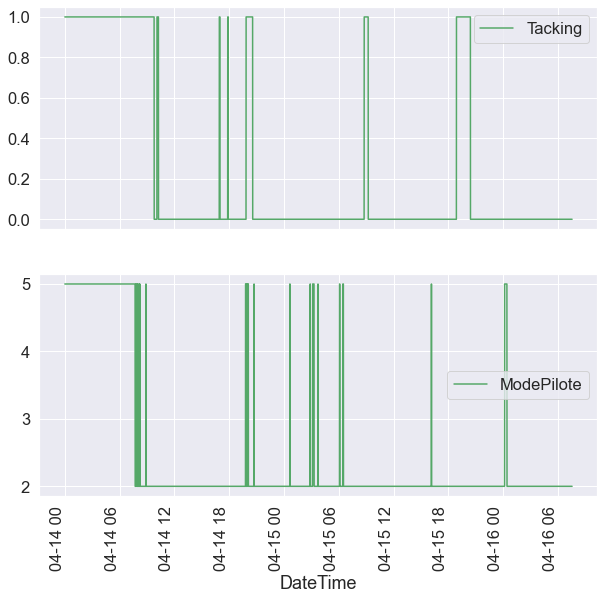

In [20]:
# Checking ModePilote and Tacking label
df[['Tacking']+ ['ModePilote']].plot(subplots = True, color = 'g', figsize = (10,10),label = 'best')
plt.xticks(rotation = 'vertical')
plt.show()


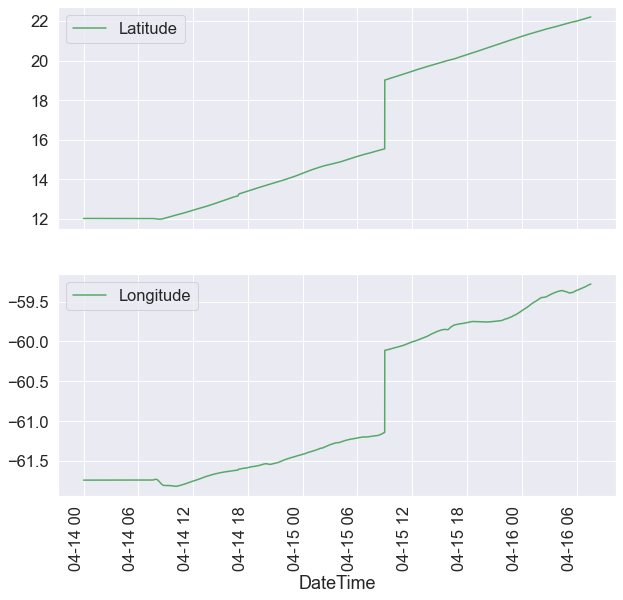

In [21]:
# Checking Longitude / Latitude
df[['Latitude','Longitude']].plot(subplots = True, color = 'g', figsize = (10,10),label = 'best')
plt.xticks(rotation = 'vertical')
plt.show()


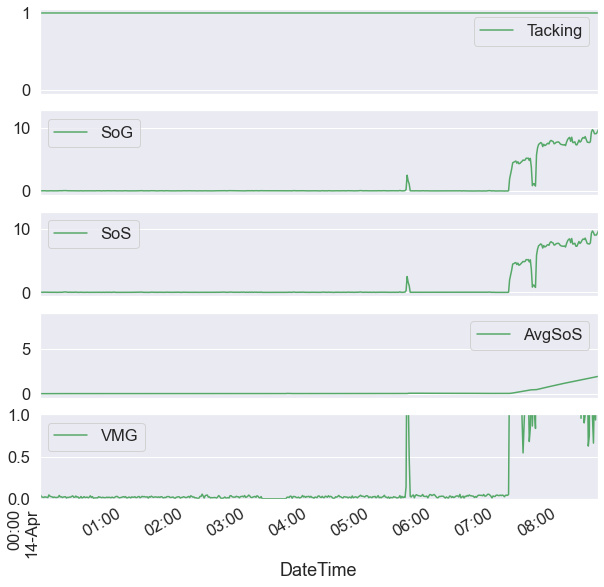

In [22]:
# Checking Speed Time Series at Low Speed
df[['Tacking']+['SoG', 'SoS', 'AvgSoS', 'VMG'] ].resample('min').mean().plot(subplots = True, color = 'g', figsize = (10,10),label = 'best')
plt.xticks(rotation = 'vertical')
plt.axis(['2019-04-14 00:00:00','2019-04-14 08:59:00', 0, 1])
plt.ylim((0,1))
plt.show()


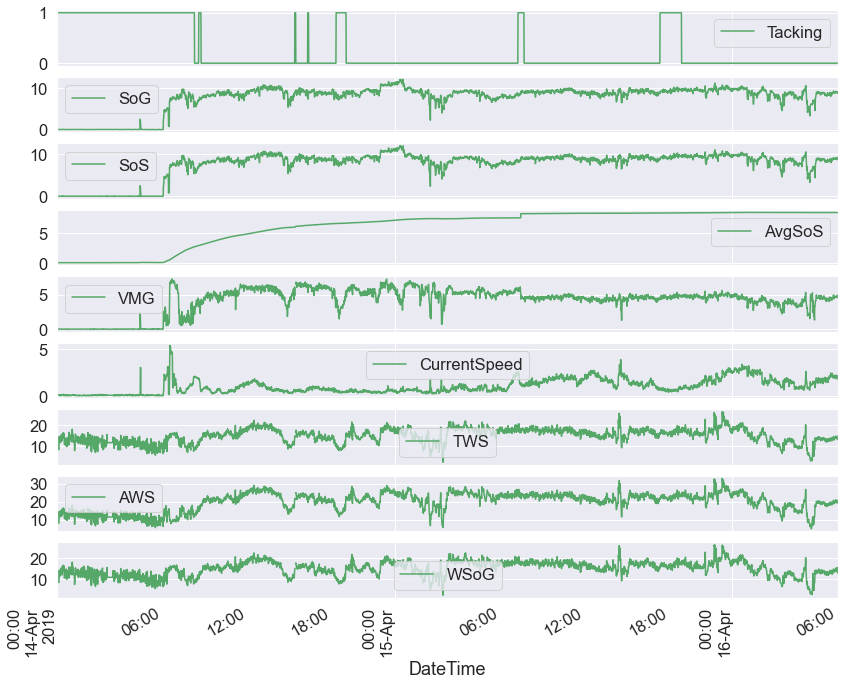

In [23]:
# Checking ModePilote and Tacking label
df[['Tacking']+['SoG', 'SoS', 'AvgSoS', 'VMG', 'CurrentSpeed', 'TWS', 'AWS','WSoG'] ].resample('min').median().plot(subplots = True, color = 'g', figsize = (14,12),label = 'best')
plt.xticks(rotation = 'vertical')
# plt.axis(['2019-04-14 00:00:00','2019-04-14 08:59:00', 0, 1])
# plt.ylim((0,1))
plt.show()

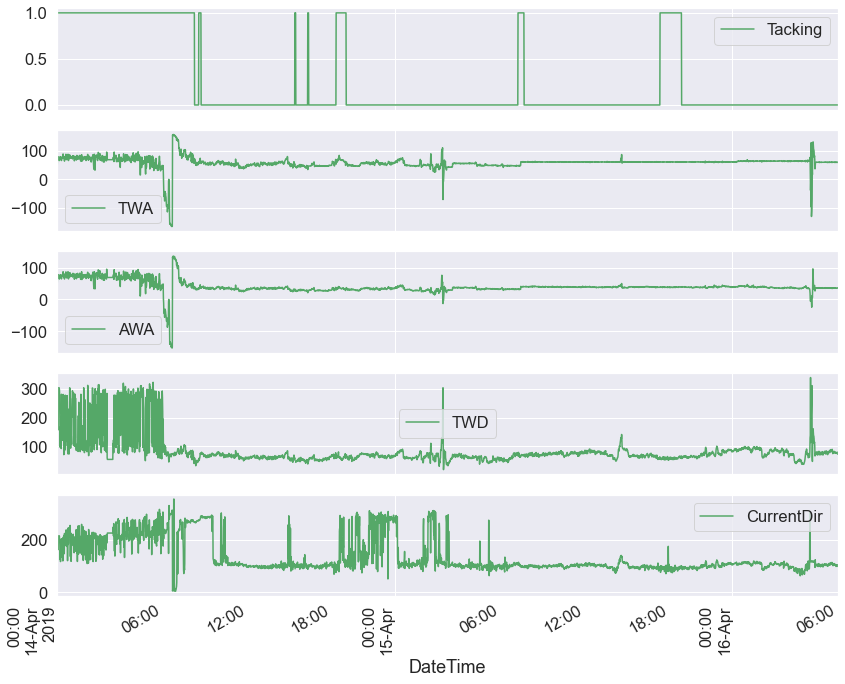

In [24]:
# Checking Angle Variables Through time
resamples = df[['Tacking']+['TWA','AWA', 'TWD', 'CurrentDir'] ].resample('1min').median()
resamples.plot(subplots = True, color = 'g', figsize = (14,12),label = 'best')
plt.xticks(rotation = 'vertical')
# plt.axis(['2019-04-14 00:00:00','2019-04-14 08:59:00', 0, 1])
# plt.ylim((0,1))
plt.show()

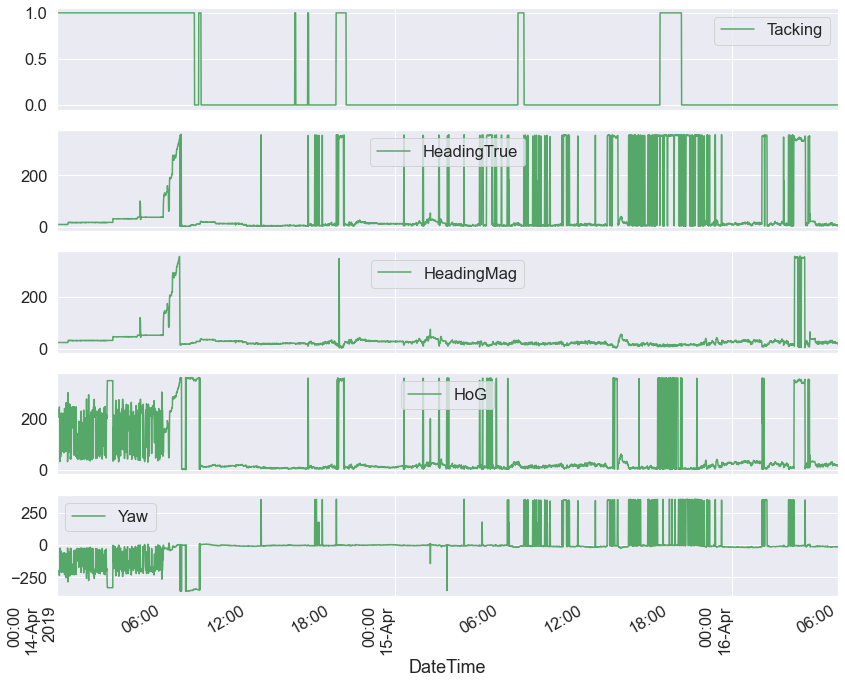

In [25]:
# Checking Angle Variables Through time
resamples = df[['Tacking']+['HeadingTrue', 'HeadingMag','HoG', 'Yaw'] ].resample('1min').median()
resamples.plot(subplots = True, color = 'g', figsize = (14,12),label = 'best')
plt.xticks(rotation = 'vertical')
# plt.axis(['2019-04-14 00:00:00','2019-04-14 08:59:00', 0, 1])
# plt.ylim((0,1))
plt.show()

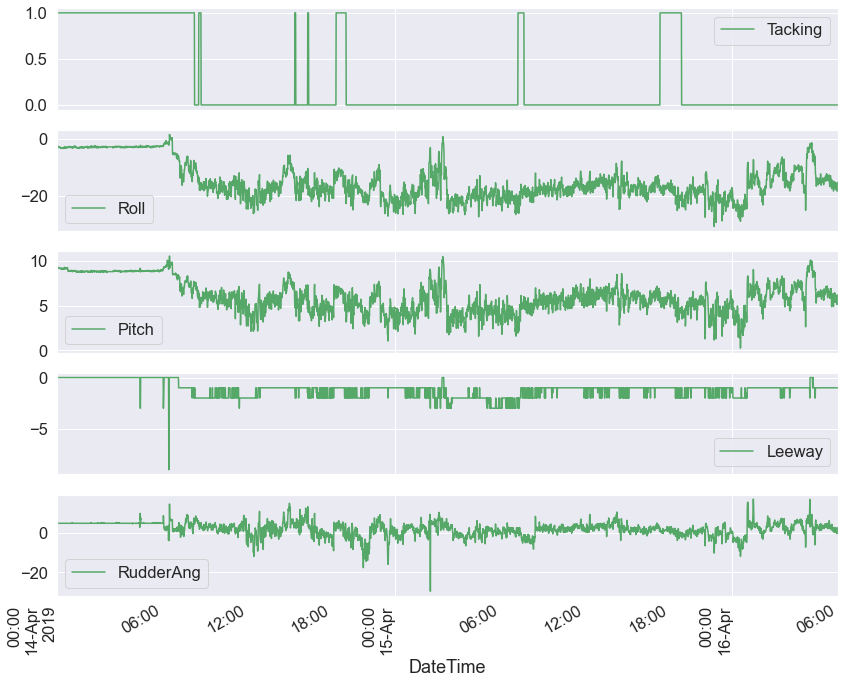

In [26]:
# Checking ModePilote and Tacking label
df[['Tacking']+['Roll', 'Pitch','Leeway','RudderAng'] ].resample('min').median().plot(subplots = True, color = 'g', figsize = (14,12),label = 'best')
plt.xticks(rotation = 'vertical')
# plt.axis(['2019-04-14 00:00:00','2019-04-14 08:59:00', 0, 1])
# plt.ylim((0,1))
plt.show()

In [27]:
# Seen dataset
# seen_mask = (df.index >= '2019-04-14 00:00:00') & (df.index < '2019-04-15 18:00:00')
seen_mask = (df.index >= '2019-04-14 08:00:00') & (df.index < '2019-04-15 18:00:00')
df_seen = df.loc[seen_mask]
# Export seen data to `.csv`
df_seen.to_csv('./data/seen_data.csv', header = True)


# Unseen dataset
unseen_mask = (df.index >= '2019-04-15 18:00:00') 
df_unseen = df.loc[unseen_mask]
# Export seen data to `.csv`
df_unseen.to_csv('./data/unseen_data.csv', header = True)

In [28]:
# Check clean_data
check = pd.read_csv('./data/clean_data.csv',header = 0)
check['DateTime'] = pd.to_datetime(check['DateTime'])
check.set_index('DateTime', inplace = True)
check.head(5)

CurrentSpeed  CurrentDir   TWS   TWA   AWS   AWA  Roll  \
DateTime                                                                      
2019-04-14 00:00:00        0.0756       123.0  10.8  48.0  10.4  48.0 -3.54   
2019-04-14 00:00:01        0.0756       123.0  10.8  48.0  10.4  48.0 -3.54   
2019-04-14 00:00:02        0.0756       123.0  10.8  48.0  10.4  48.0 -3.52   
2019-04-14 00:00:03        0.0756       123.0  10.8  48.0  10.4  48.0 -3.52   
2019-04-14 00:00:04        0.0756       123.0  10.8  48.0  10.4  48.0 -3.50   

                        Pitch  HeadingMag    HoG  HeadingTrue    AirTemp  \
DateTime                                                                   
2019-04-14 00:00:00  9.080000        24.0  308.0          9.0  27.717678   
2019-04-14 00:00:01  9.080000        24.0  308.0          9.0  27.717678   
2019-04-14 00:00:02  9.099999        24.0  308.0          9.0  27.717678   
2019-04-14 00:00:03  9.099999        24.0  308.0          9.0  27.717678   
2019-04-14 00:00:04  9.099999        24.0  308.0          9.0  27.717678   

                     Longitude   Latitude     SoG  SoS  AvgSoS     VMG  \
DateTime                                                                 
2019-04-14 00:00:00 -61.739284  12.010968  0.0864  0.0  0.0864  0.0594   
2019-04-14 00:00:01 -61.739284  12.010968  0.0864  0.0  0.0864  0.0594   
2019-04-14 00:00:02 -61.739284  12.010968  0.0864  0.0  0.0864  0.0594   
2019-04-14 00:00:03 -61.739284  12.010968  0.0864  0.0  0.0864  0.0594   
2019-04-14 00:00:04 -61.739284  12.010968  0.0864  0.0  0.0864  0.0594   

                     RudderAng  Leeway    TWD  WSoG  VoltageDrawn  ModePilote  \
DateTime                                                                        
2019-04-14 00:00:00   4.666667     0.0  356.0  10.5          11.8         5.0   
2019-04-14 00:00:01   4.666667     0.0  356.0  10.5          11.8         5.0   
2019-04-14 00:00:02   4.666667     0.0  356.0   9.9          11.8         5.0   
2019-04-14 00:00:03   4.666667     0.0  356.0   9.9          11.8         5.0   
2019-04-14 00:00:04   4.666667     0.0  356.0  10.3          11.8         5.0   

                       Yaw  Tacking  
DateTime                             
2019-04-14 00:00:00 -299.0      1.0  
2019-04-14 00:00:01 -299.0      1.0  
2019-04-14 00:00:02 -299.0      1.0  
2019-04-14 00:00:03 -299.0      1.0  
2019-04-14 00:00:04 -299.0      1.0

### EDA Insights

- Handling Duplicate Rows:
    - I was able to find 20k duplicated rows and removed them

- Handling Missing Values (`NaN`):
    - I decided to drop all five rows that were not correctly labeled. Another approach could have consisted in filling those missing labels with adyacent values. This is keeping in mind that our data was generated at intervals of 1 second and the label tends to remain with the same value for relatively prolonged periods of time. However, as only 5 rows (out of 45k) were missing their label and I am not a experienced sailor, I opted to discard them.
    - All other columns contained around 160 `NaN` values
    - By exploring the subset of rows with missing values (see `msno` matrix plot for reference), I noticed a group of rows that contained missing data on every feature except for `DateTime` and the target `Tacking`. Hence, I decided to drop those rows that were missing the values of more than half of their features. I.e: `dropna()` with a `threshold` of half the number of features.
    - Lastly, I ended up with a DataFrame in which all their columns where missing less than 10 values. These values appeared to be missing at random (not clustered in time). To input missing values, I decided to use a combination of:
        - `pd.fillna()`: I used this function with `method = 'ffill'` to input 'DateTime' missing values. I took advantage of the fact that data was collected at intervals of 1 second.
        - `pd.interpolate()`: as a small amount of cells were missing for each feature and I had numeric data at 1 second intervals I used this function to fill missing cells by interpolating adjacent values. 

- We are dealing with an imbalanced dataset so `Accuracy` will not be a good choice of metric for the models we are going to be building in Part II) of this challenge.

### Variable Correlation and Distribution Analysis

Objectives: 
   - Observing the relationship of different variables through a Correlation Matrix
   - Analyzing variables distributions in Histograms
   - Do a Boxplot analysis of the variables with respect to the target variable
   - Plot the evolution of some variables trough time

In [29]:
# Select dataset to explore
df = None

# Importing ALL data. This would allow us to check distributions in whole date range
# df= pd.read_csv('./data/clean_data.csv', header = 0)

# Importing ONLY SEEN data. This would allow us to check distributions onle for dates <= '2019-04-15 17:59:59'
df= pd.read_csv('./data/seen_data.csv', header = 0)

# Cast dates into the right format
df['DateTime'] = pd.to_datetime(df['DateTime'])
assert df['DateTime'].dtype == 'datetime64[ns]'

# Set DateTime as Index for Time Series analysis
df.set_index('DateTime', inplace = True)

# Check raw data variable information: rows, columns, non-nulls, dtypes
df.info()

# Check statistics of SEEN data
get_summary(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122240 entries, 2019-04-14 08:00:00 to 2019-04-15 17:59:59
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CurrentSpeed  122240 non-null  float64
 1   CurrentDir    122240 non-null  float64
 2   TWS           122240 non-null  float64
 3   TWA           122240 non-null  float64
 4   AWS           122240 non-null  float64
 5   AWA           122240 non-null  float64
 6   Roll          122240 non-null  float64
 7   Pitch         122240 non-null  float64
 8   HeadingMag    122240 non-null  float64
 9   HoG           122240 non-null  float64
 10  HeadingTrue   122240 non-null  float64
 11  AirTemp       122240 non-null  float64
 12  Longitude     122240 non-null  float64
 13  Latitude      122240 non-null  float64
 14  SoG           122240 non-null  float64
 15  SoS           122240 non-null  float64
 16  AvgSoS        122240 non-null  float64
 17  VMG           

count        mean         std         min        25%  \
CurrentSpeed  122240.0    1.047442    0.678345    0.145800   0.540000   
CurrentDir    122240.0  132.663592   72.853045    0.000000  95.000000   
TWS           122240.0   15.839726    3.168363    1.700000  14.100000   
TWA           122240.0   54.966324   22.539903 -179.000000  48.000000   
AWS           122240.0   21.695670    4.192162    3.200000  19.900000   
AWA           122240.0   34.966529   18.321923 -177.000000  31.000000   
Roll          122240.0  -17.096156    5.009313  -38.040001 -20.439999   
Pitch         122240.0    5.388033    2.555321   -7.880000   3.720000   
HeadingMag    122240.0   29.602078   40.888781    0.000000  18.000000   
HoG           122240.0   45.221466   98.100039    0.000000   8.000000   
HeadingTrue   122240.0   63.079168  124.362913    0.000000   4.000000   
AirTemp       122240.0   27.338779    1.558118   21.107229  26.273378   
Longitude     122240.0  -61.085980    0.715188  -61.816873 -61.617845   
Latitude      122240.0   15.313736    2.784924   11.971172  13.103732   
SoG           122240.0    8.800684    1.086552    1.166400   8.191800   
SoS           122240.0    8.750760    1.105779    1.198800   8.100000   
AvgSoS        122240.0    6.675035    1.801995    0.507600   6.004800   
VMG           122240.0    5.000613    1.437141    0.000000   4.201200   
RudderAng     122240.0    1.503976    4.735663  -37.333336  -1.333333   
Leeway        122240.0   -1.484743    0.664769  -10.000000  -2.000000   
TWD           122240.0   66.969458   14.601829    2.000000  59.000000   
WSoG          122240.0   15.844708    3.952792    0.100000  13.300000   
VoltageDrawn  122240.0   12.497460    0.607688   11.100000  12.100000   
ModePilote    122240.0    2.046335    0.369945    2.000000   2.000000   
Yaw           122240.0   17.859211  125.059051 -359.000000  -8.000000   
Tacking       122240.0    0.094593    0.292653    0.000000   0.000000   

                     50%         75%         max  number_nan  number_distinct  \
CurrentSpeed    0.831600    1.431000    5.697000         0.0              915   
CurrentDir    104.000000  124.000000  359.000000         0.0              365   
TWS            16.200001   18.100000   28.600000         0.0              271   
TWA            55.000000   60.000000  177.000000         0.0              295   
AWS            22.400000   24.500000   35.500000         0.0              317   
AWA            35.000000   39.000000  169.000000         0.0              254   
Roll          -17.480000  -14.259999    6.640000         0.0             1809   
Pitch           5.480000    7.140000   15.660000         0.0              967   
HeadingMag     23.000000   29.000000  359.000000         0.0              241   
HoG            13.000000   19.000000  359.000000         0.0              225   
HeadingTrue    10.000000   17.000000  359.000000         0.0              232   
AirTemp        26.995529   28.550928   31.439528         0.0              187   
Longitude     -61.377370  -60.098562  -59.763411         0.0           108337   
Latitude       14.479938   19.093086   20.304722         0.0           121638   
SoG             8.883000    9.428400   12.598201         0.0             1625   
SoS             8.796600    9.396000   12.700800         0.0              115   
AvgSoS          7.365600    8.316000    8.407800         0.0             1315   
VMG             5.157000    5.999400    9.860400         0.0             1632   
RudderAng       1.333333    4.333333   42.333336         0.0              163   
Leeway         -1.000000   -1.000000    4.000000         0.0               13   
TWD            66.000000   74.000000  359.000000         0.0              229   
WSoG           15.900000   18.500000   35.700001         0.0              320   
VoltageDrawn   12.300000   12.600000   14.200000         0.0               33   
ModePilote      2.000000    2.000000    5.000000         0.0                2   
Yaw            -4.00

In [30]:
# Importing ONLY SEEN data. This would allow us to check distributions only for dates <= '2019-04-15 17:59:59'
unseen_df= pd.read_csv('./data/unseen_data.csv', header = 0)

# Cast dates into the right format
unseen_df['DateTime'] = pd.to_datetime(unseen_df['DateTime'])
assert unseen_df['DateTime'].dtype == 'datetime64[ns]'

# Set DateTime as Index for Time Series analysis
unseen_df.set_index('DateTime', inplace = True)

# Check raw data variable information: rows, columns, non-nulls, dtypes
unseen_df.info()

# Check statistics of SEEN data
get_summary(unseen_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48799 entries, 2019-04-15 18:00:00 to 2019-04-16 07:33:19
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CurrentSpeed  48799 non-null  float64
 1   CurrentDir    48799 non-null  float64
 2   TWS           48799 non-null  float64
 3   TWA           48799 non-null  float64
 4   AWS           48799 non-null  float64
 5   AWA           48799 non-null  float64
 6   Roll          48799 non-null  float64
 7   Pitch         48799 non-null  float64
 8   HeadingMag    48799 non-null  float64
 9   HoG           48799 non-null  float64
 10  HeadingTrue   48799 non-null  float64
 11  AirTemp       48799 non-null  float64
 12  Longitude     48799 non-null  float64
 13  Latitude      48799 non-null  float64
 14  SoG           48799 non-null  float64
 15  SoS           48799 non-null  float64
 16  AvgSoS        48799 non-null  float64
 17  VMG           48799 non-null  floa

count        mean         std         min        25%  \
CurrentSpeed  48799.0    1.612557    0.730774    0.243000   1.004400   
CurrentDir    48799.0  100.855960   21.193099    0.000000  93.000000   
TWS           48799.0   15.018765    3.899798    1.900000  12.800000   
TWA           48799.0   60.369854   15.275144 -177.000000  59.000000   
AWS           48799.0   20.706229    4.609686    2.900000  18.299999   
AWA           48799.0   37.657626    7.175882  -53.000000  35.000000   
Roll          48799.0  -16.552710    5.710042  -39.299999 -20.240000   
Pitch         48799.0    5.706719    2.725393   -7.180000   3.960000   
HeadingMag    48799.0   36.092635   68.476518    0.000000  15.000000   
HoG           48799.0   70.013340  122.098636    0.000000  10.000000   
HeadingTrue   48799.0  122.888348  161.687505    0.000000   6.000000   
AirTemp       48799.0   26.770079    1.123544   22.940378  26.106730   
Longitude     48799.0  -59.554594    0.167387  -59.763398 -59.742689   
Latitude      48799.0   21.302313    0.550739   20.304764  20.830098   
SoG           48799.0    8.927626    1.171673    1.112400   8.483400   
SoS           48799.0    8.877715    1.200194    0.799200   8.397000   
AvgSoS        48799.0    8.486519    0.038536    8.407800   8.456400   
VMG           48799.0    4.318469    1.300792    0.000000   3.537000   
RudderAng     48799.0    1.422693    5.569391  -30.333334  -2.000000   
Leeway        48799.0   -1.289084    0.564480  -10.000000  -2.000000   
TWD           48799.0   75.976127   23.827160    0.000000  64.000000   
WSoG          48799.0   15.021787    4.574852    0.000000  12.100000   
VoltageDrawn  48799.0   12.416411    0.512178   11.300000  12.100000   
ModePilote    48799.0    2.057727    0.412130    2.000000   2.000000   
Yaw           48799.0   52.875028  139.672851 -359.000000 -14.000000   
Tacking       48799.0    0.113117    0.316739    0.000000   0.000000   

                     50%         75%         max  number_nan  number_distinct  \
CurrentSpeed    1.528200    2.133000    3.996000         0.0              637   
CurrentDir    102.000000  110.000000  359.000000         0.0              294   
TWS            15.300000   17.500000   29.100000         0.0              274   
TWA            61.000000   63.000000  179.000000         0.0              319   
AWS            21.200001   23.700001   37.000000         0.0              334   
AWA            38.000000   41.000000  132.000000         0.0              158   
Roll          -16.740000  -13.139999   10.139999         0.0             1819   
Pitch           5.760000    7.500000   17.359999         0.0              947   
HeadingMag     22.000000   29.000000  359.000000         0.0              102   
HoG            21.000000   31.000000  359.000000         0.0               99   
HeadingTrue    13.000000  351.000000  359.000000         0.0              101   
AirTemp        26.995529   27.551029   29.439728         0.0              118   
Longitude     -59.554325  -59.385757  -59.279375         0.0            38914   
Latitude       21.341788   21.782346   22.209945         0.0            48662   
SoG             9.142200    9.671400   12.420000         0.0             1493   
SoS             9.099000    9.595800   12.598200         0.0              116   
AvgSoS          8.499600    8.521200    8.532001         0.0               24   
VMG             4.438800    5.227200    9.158401         0.0             1462   
RudderAng       1.000000    4.333333   30.333334         0.0              152   
Leeway         -1.000000   -1.000000    5.000000         0.0               15   
TWD            75.000000   85.000000  359.000000         0.0              328   
WSoG           15.100000   17.900000   33.700001         0.0              328   
VoltageDrawn   12.300000   12.500000   14.200000         0.0               31   
ModePilote      2.000000    2.000000    5.000000         0.0                2   
Yaw            -9.000000   -2.000000  359.0000

In [31]:
# %%capture
# Feature References
var_dict.transpose().sort_values('units')

name             units     range  \
TensPilote  VoltageDrawn             Volts      None   
Longitude      Longitude           degrees  [0, 360]   
Barre          RudderAng           degrees      None   
Latitude        Latitude           degrees  [0, 360]   
Derive            Leeway           degrees      None   
Route        HeadingTrue           degrees      None   
CapFond              HoG           degrees      None   
CapMagPil     HeadingMag           degrees      None   
3DH_Roulis          Roll           degrees      None   
AngVentApp           AWA           degrees      None   
DirVentFnd           TWD           degrees      None   
AngVentRl            TWA           degrees      None   
DirCourMes    CurrentDir           degrees      None   
3DH_Tang           Pitch           degrees      None   
TempAir          AirTemp   degrees Celcius      None   
VMG                  VMG             knots      None   
VitVentFnd          WSoG             knots      None   
VitSurfMoy        AvgSoS             knots      None   
VitCourMes  CurrentSpeed             knots      None   
VitFond              SoG             knots      None   
VitVentApp           AWS             knots      None   
VitVentRl            TWS             knots      None   
VitesSurf            SoS             knots      None   
LatDecMin      LatDecMin  minutes of angle             
LonDecMin      LonDecMin  minutes of angle             
ModePilote    ModePilote           unclear   unclear   

                                                  description  
TensPilote    Voltage drawn by the system of one of its parts  
Longitude                             Longitudinal coordinate  
Barre                                            Rudder angle  
Latitude                               Latitudinal coordinate  
Derive                                                         
Route       true heading. True heading - heading over grou...  
CapFond                                   heading over ground  
CapMagPil                                    magnetic heading  
3DH_Roulis                         Roll, also equals to -Heel  
AngVentApp                                Apparent Wind Angle  
DirVentFnd                                True wind direction  
AngVentRl                                     True Wind Angle  
DirCourMes                                                     
3DH_Tang                                          Pitch angle  
TempAir                                       air temperature  
VMG         Velocity made good. Calculated as Speed over s...  
VitVentFnd                             Wind speed over ground  
VitSurfMoy                         Average speed over surface  
VitCourMes                                                     
VitFond                                     Speed over ground  
VitVentApp                                Apparent Wind Speed  
VitVentRl                                     True Wind Speed  
VitesSurf                                  Speed over surface  
LatDecMin                    Decimals of the latitude minutes  
LonDecMin                   Decimals of the longitude minutes  
ModePilote                                            unclear

In [32]:
# Grouping our (27) features by similar categories / units 

# Speed Group 1 [knots]
wind_sp_cols = ['TWS', 'AWS', 'WSoG', 'CurrentSpeed']

# Speed Group 2 [knots]
ship_sp_cols = ['SoG', 'SoS', 'AvgSoS', 'VMG']

# Direction Group 1 [degrees]
direction_cols = ['TWA', 'AWA', 'TWD', 'CurrentDir']

# Direction Group 2 [degrees]
heading_cols = ['HeadingMag', 'HoG', 'HeadingTrue', 'Yaw']

# Axes Group 1 [degrees]
axes_cols = ['Roll', 'Pitch']

# Axes Group 2 [degrees] - Rudder (Timon)
angle_cols = ['RudderAng', 'Leeway']

# Pilote Group [degrees]
voltgage_cols = ['VoltageDrawn'] 

# GeoLoc Group [degrees]
geo_cols = ['Longitude', 'Latitude']

# Temperature Group [Celcius]
temperature_col = ['AirTemp']

# DateTime index
datetime_col = 'DateTime'

# Mode Pilote 
mp_col = 'ModePilote'

# Target Variable
target = 'Tacking'

df.columns


Index(['CurrentSpeed', 'CurrentDir', 'TWS', 'TWA', 'AWS', 'AWA', 'Roll',
       'Pitch', 'HeadingMag', 'HoG', 'HeadingTrue', 'AirTemp', 'Longitude',
       'Latitude', 'SoG', 'SoS', 'AvgSoS', 'VMG', 'RudderAng', 'Leeway', 'TWD',
       'WSoG', 'VoltageDrawn', 'ModePilote', 'Yaw', 'Tacking'],
      dtype='object')

In [33]:
%%capture
# Compute the correlation matrix
corr = df.corr()
corr

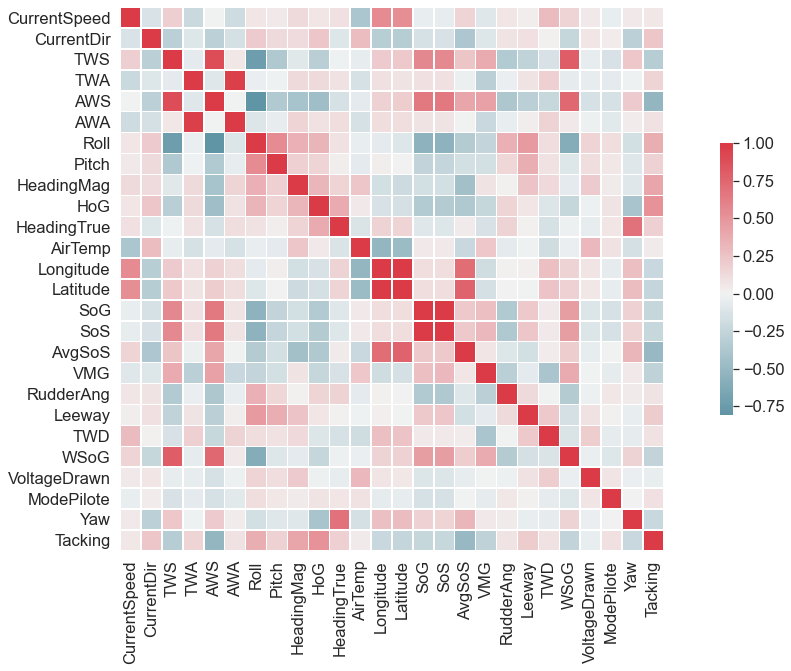

In [34]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### Checking Distribution of Variables

- Check those looking normal. Standarization makes sense here!
- Check those that are skewed.Do we need to apply `log` transformation?
- Be careful with ModePilote might be Data Leakage 
- Latitude and Longitude virtually do not vary - seems reasonable if navigating two days in same area

#### Correlation + Distribution analysis

- TWS, AWS and WSog are highly correlated. WSoG is the one that seems more Normally distributed.
- SoG, SoS, AvgSoS and VMG seem highly correlated. VMG looks Normally distributed but with a large number of 0 counts. These are usually observed when Tacking value is 1.
- TWA, AWA are highly correlated. TWA seems a bit more Normally distributed.

In [35]:
# Get a Variable description
var_dict['CapFond'].description
var_dict['VMG'].description

'Velocity made good. Calculated as Speed over surface * cos(True Wind angle)'

In [36]:
# Importing ONLY UNSEEN data. This would allow us to check distributions onle for dates <= '2019-04-15 17:59:59'
df2= pd.read_csv('./data/unseen_data.csv', header = 0)

# Cast dates into the right format
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
assert df2['DateTime'].dtype == 'datetime64[ns]'

# Set DateTime as Index for Time Series analysis
df2.set_index('DateTime', inplace = True)

# Check raw data variable information: rows, columns, non-nulls, dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48799 entries, 2019-04-15 18:00:00 to 2019-04-16 07:33:19
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CurrentSpeed  48799 non-null  float64
 1   CurrentDir    48799 non-null  float64
 2   TWS           48799 non-null  float64
 3   TWA           48799 non-null  float64
 4   AWS           48799 non-null  float64
 5   AWA           48799 non-null  float64
 6   Roll          48799 non-null  float64
 7   Pitch         48799 non-null  float64
 8   HeadingMag    48799 non-null  float64
 9   HoG           48799 non-null  float64
 10  HeadingTrue   48799 non-null  float64
 11  AirTemp       48799 non-null  float64
 12  Longitude     48799 non-null  float64
 13  Latitude      48799 non-null  float64
 14  SoG           48799 non-null  float64
 15  SoS           48799 non-null  float64
 16  AvgSoS        48799 non-null  float64
 17  VMG           48799 non-null  floa

### Histograms

#### By building histograms we can check how the general distribution of our variables behave (both in our Train/Test set)

In [37]:
def plot_histograms(data,features,rows,cols, bins = 20):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].hist(bins=bins,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='k')

    fig.tight_layout()  
    plt.show()
    return

#### By building pairplot we can check whether we have variables that show some potential separability with respect to our binary lable (i.e. Tacking vs No Tacking)

In [38]:
def plot_pairplots(data,features, hue = 'Tacking'):
    fig=plt.figure(figsize=(10,10))
    fig.tight_layout() 
    sns.pairplot(data[features+['Tacking']],hue = hue)
    plt.show()
    return

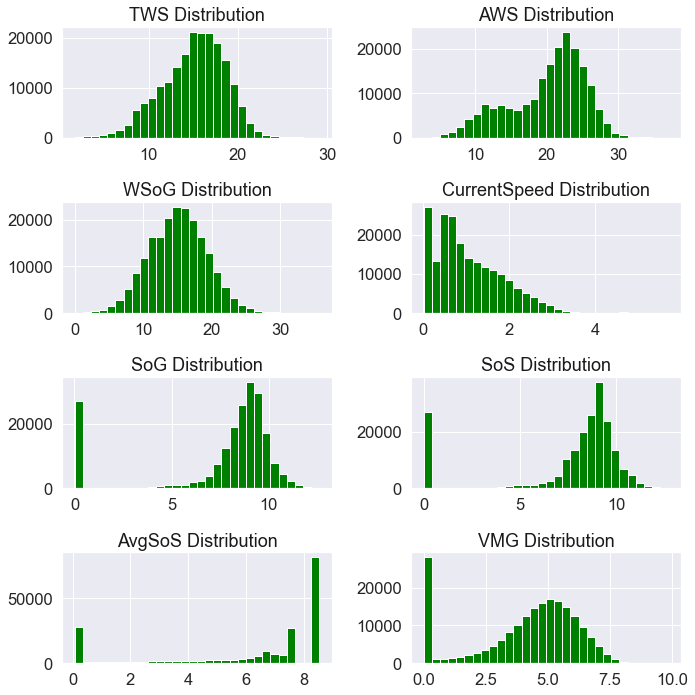

In [39]:
# Checking speed related distributions
plot_histograms(clean_df,wind_sp_cols+ship_sp_cols,4,2, 30)

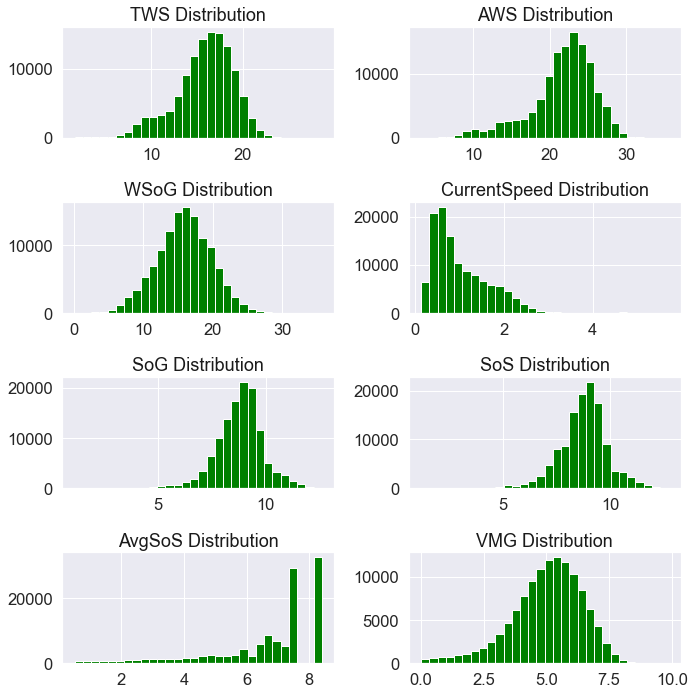

In [40]:
# Checking speed related distributions
plot_histograms(df,wind_sp_cols+ship_sp_cols,4,2, 30)

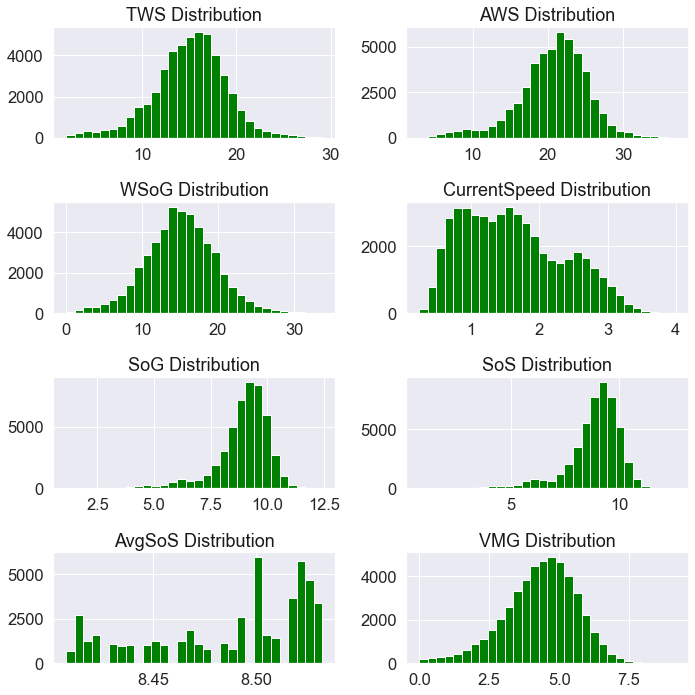

In [41]:
plot_histograms(df2,wind_sp_cols+ship_sp_cols,4,2, 30)

<Figure size 720x720 with 0 Axes>

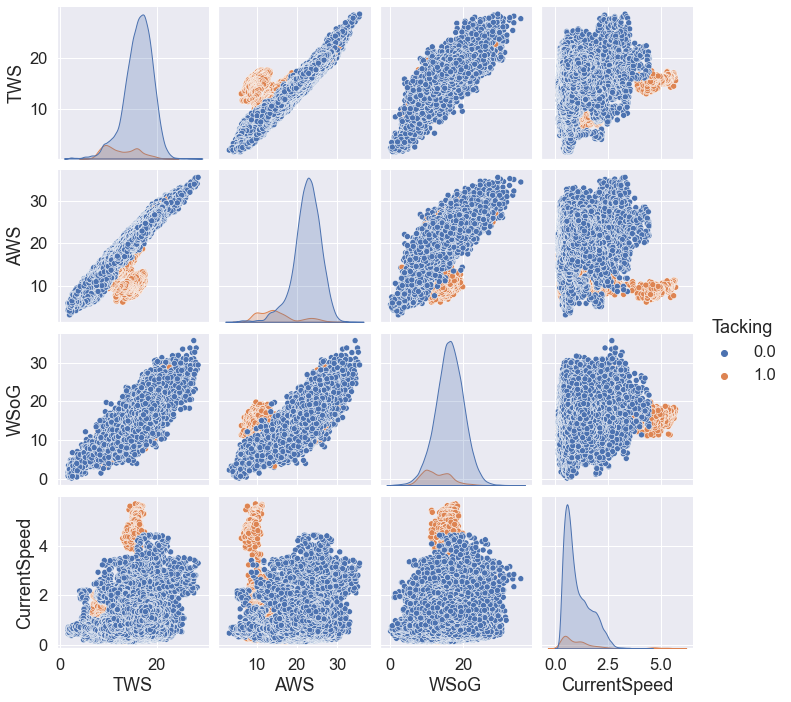

In [42]:
# Checking pairplots related distributions
plot_pairplots(df,wind_sp_cols)

<Figure size 720x720 with 0 Axes>

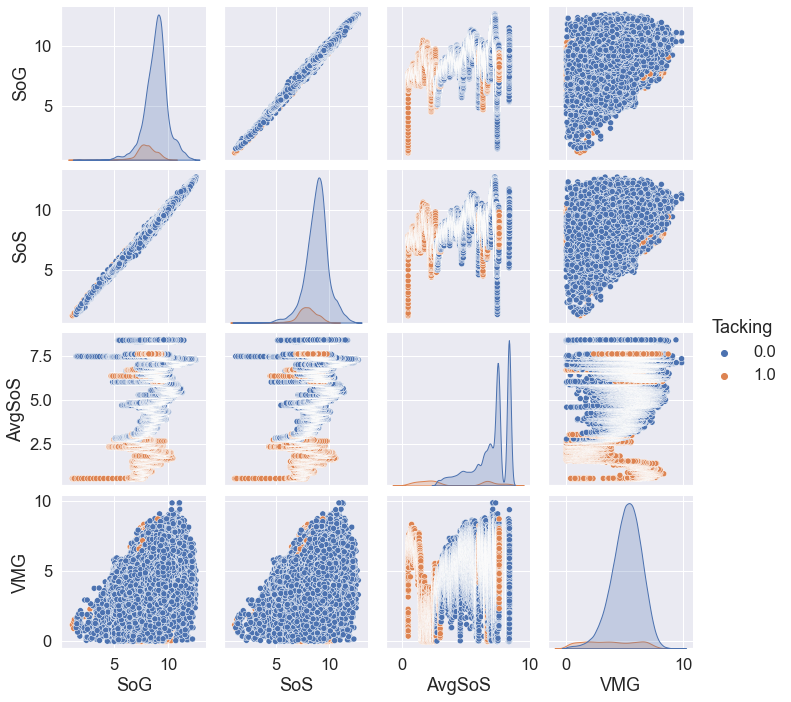

In [43]:
# Checking pairplots related distributions
plot_pairplots(df,ship_sp_cols)

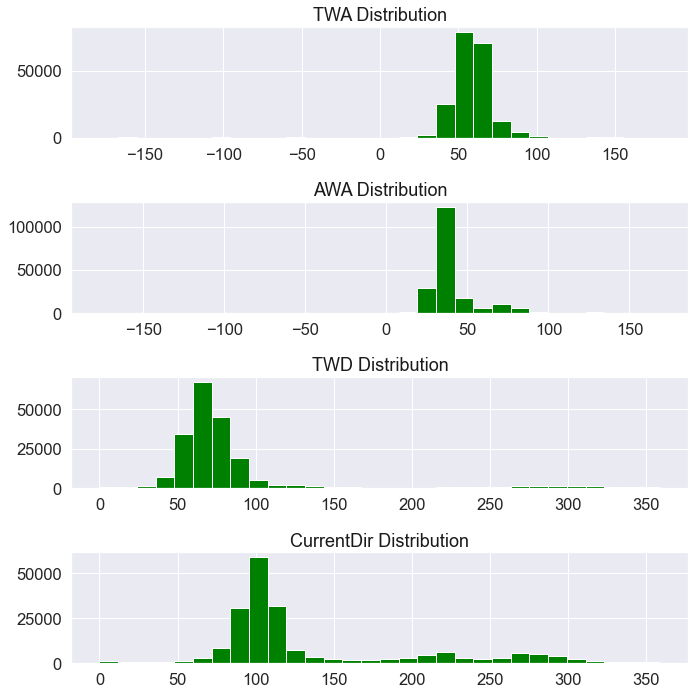

In [44]:
# Check wind/current angle/direction distributions
plot_histograms(clean_df,direction_cols,4,1, 30)

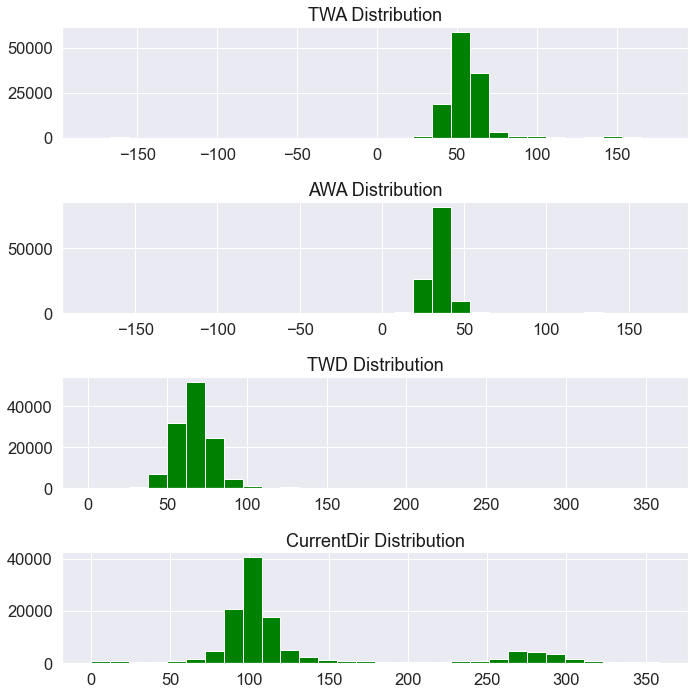

In [45]:
# Check wind/current angle/direction distributions
plot_histograms(df,direction_cols,4,1, 30)

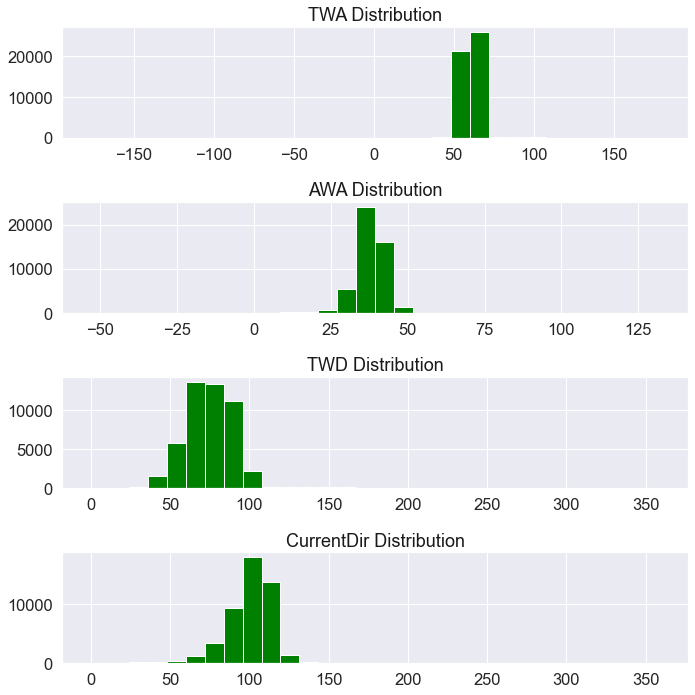

In [46]:
plot_histograms(df2,direction_cols,4,1, 30)

<Figure size 720x720 with 0 Axes>

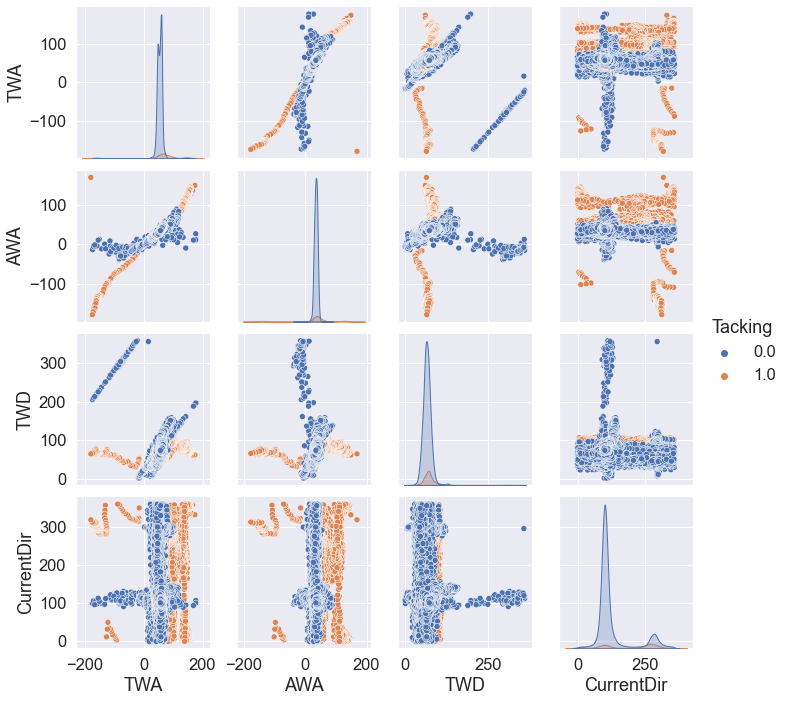

In [47]:
# Checking pairplots related distributions
plot_pairplots(df,direction_cols)

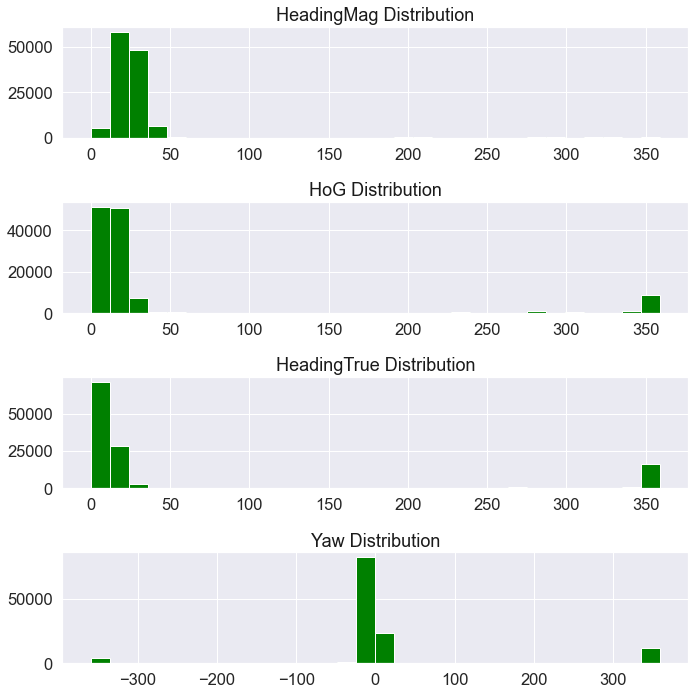

In [85]:
# Check magnetic direction distributions
plot_histograms(df,heading_cols,4,1,30)

# Difinition: True heading - heading over ground = Yaw'

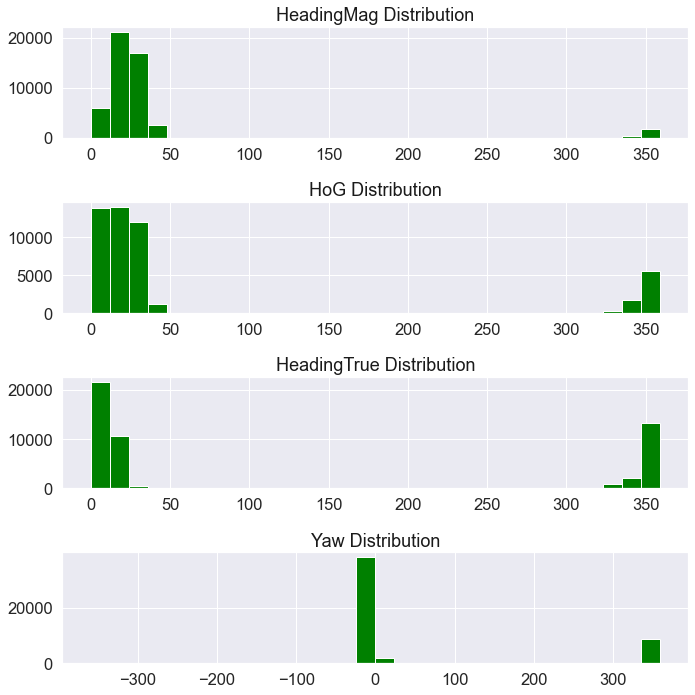

In [49]:
plot_histograms(df2,heading_cols,4,1,30)

<Figure size 720x720 with 0 Axes>

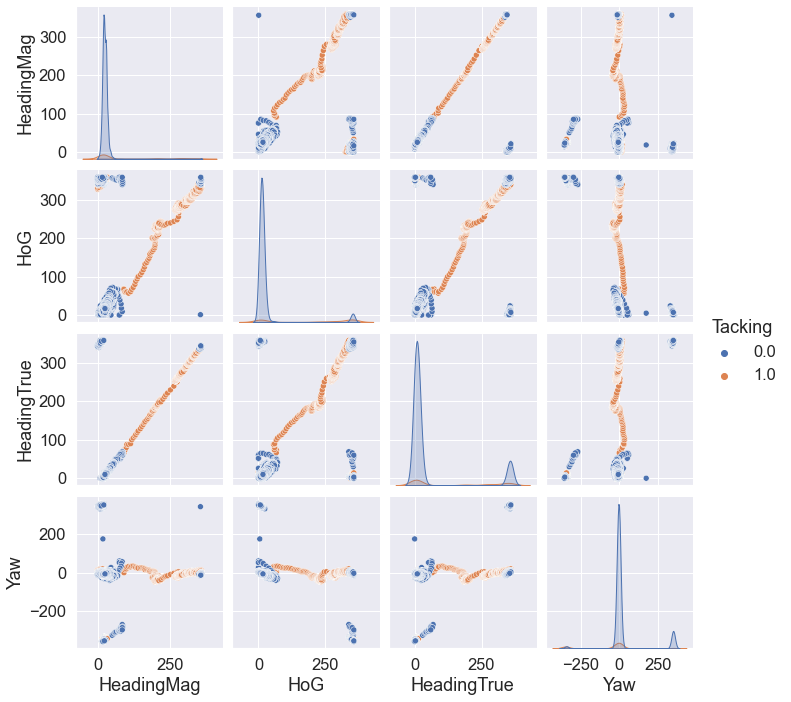

In [50]:
# Checking pairplots related distributions
plot_pairplots(df,heading_cols)

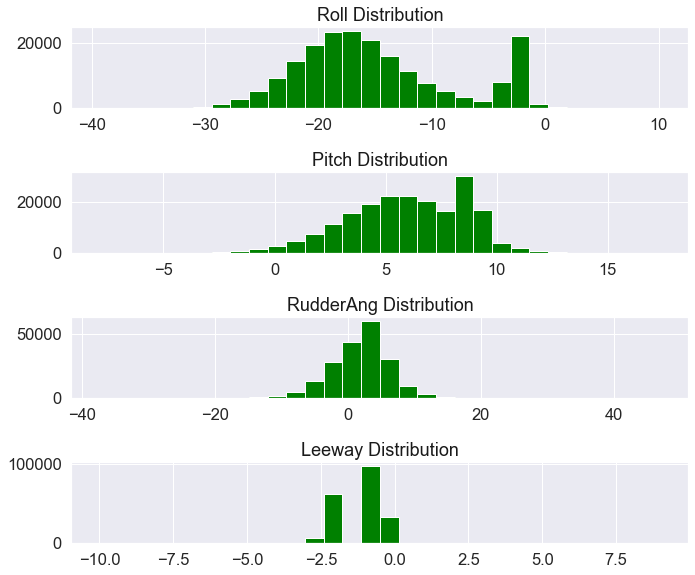

In [51]:
# Check axes/angle distributions
plot_histograms(clean_df,axes_cols+angle_cols,5,1,30)

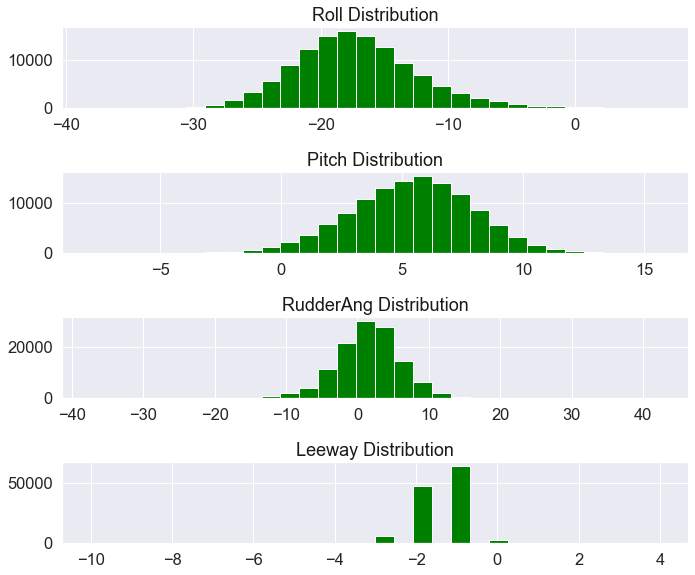

In [52]:
# Check axes/angle distributions
plot_histograms(df,axes_cols+angle_cols,5,1,30)
# plot_histograms(df['2019-04-14 08:00:00':'2019-04-15 18:00:00'],axes_cols+angle_cols,5,1,30)

# RudderAng = Angulo de Timon

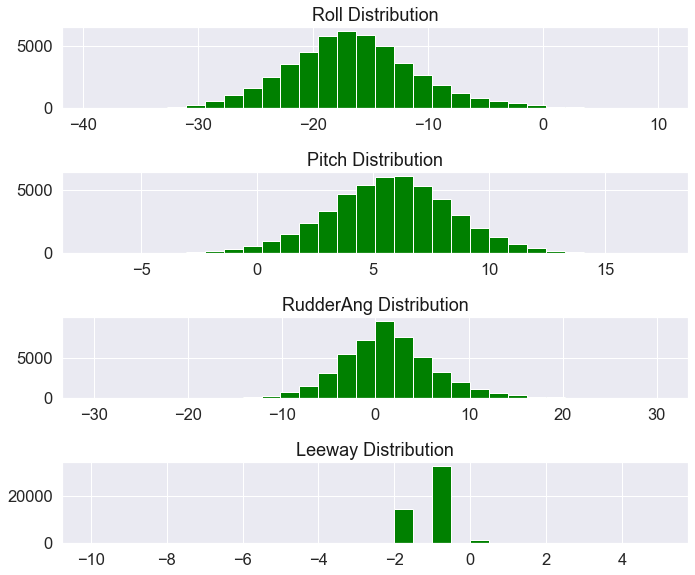

In [53]:
# Check axes/angle distributions
plot_histograms(df2,axes_cols+angle_cols,5,1,30)

In [54]:
# Function to check unique values of categorical variables and their respective counts
def counting_values(df, var_list, sort = True, verbose = True):
    for col in var_list:
        try:
            series = None
            series = df[col]
            if verbose:
                print("Counts for '{}' variable:".format(col))
                if sort:
                    print(series.value_counts(dropna = False).sort_index())
                    print()
                else:
                    print(series.value_counts(dropna = False))
                    print()
        except:
            pass
    return

# Inspecting Leeway variable. I.e: those with less than 'x' unique values
uniques = 20
columns = [col for col in df.columns if len(df[col].unique()) < uniques ]
# Call function on our data
counting_values(df,columns)

Counts for 'Leeway' variable:
-10.0        6
-9.0         3
-8.0         2
-7.0         1
-6.0         3
-5.0        31
-4.0       578
-3.0      6296
-2.0     47813
-1.0     64400
 0.0      3096
 1.0        10
 4.0         1
Name: Leeway, dtype: int64

Counts for 'ModePilote' variable:
2.0    120352
5.0      1888
Name: ModePilote, dtype: int64

Counts for 'Tacking' variable:
0.0    110677
1.0     11563
Name: Tacking, dtype: int64



<Figure size 720x720 with 0 Axes>

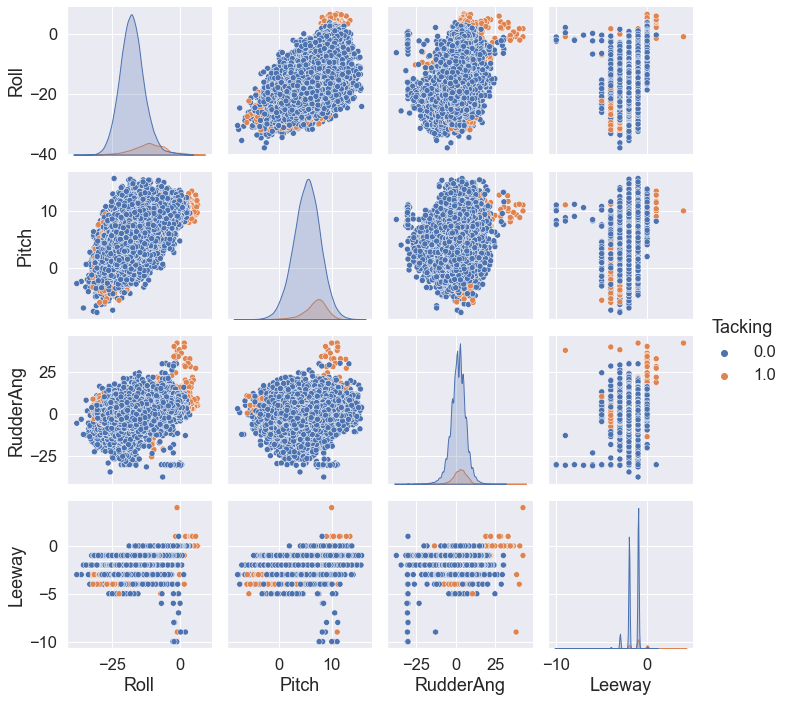

In [55]:
# Checking pairplots related distributions
plot_pairplots(df,axes_cols+angle_cols)

### Boxplots

In [56]:
def plot_boxplots(data,features, rows, cols, hue = None):
    fig=plt.figure(figsize=(12,12))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(x='Tacking', y=feature, data = data, hue = hue, ax=ax)
        ax.set_title(feature+" Distribution",color='k')

    fig.tight_layout()  
    plt.show()
    return

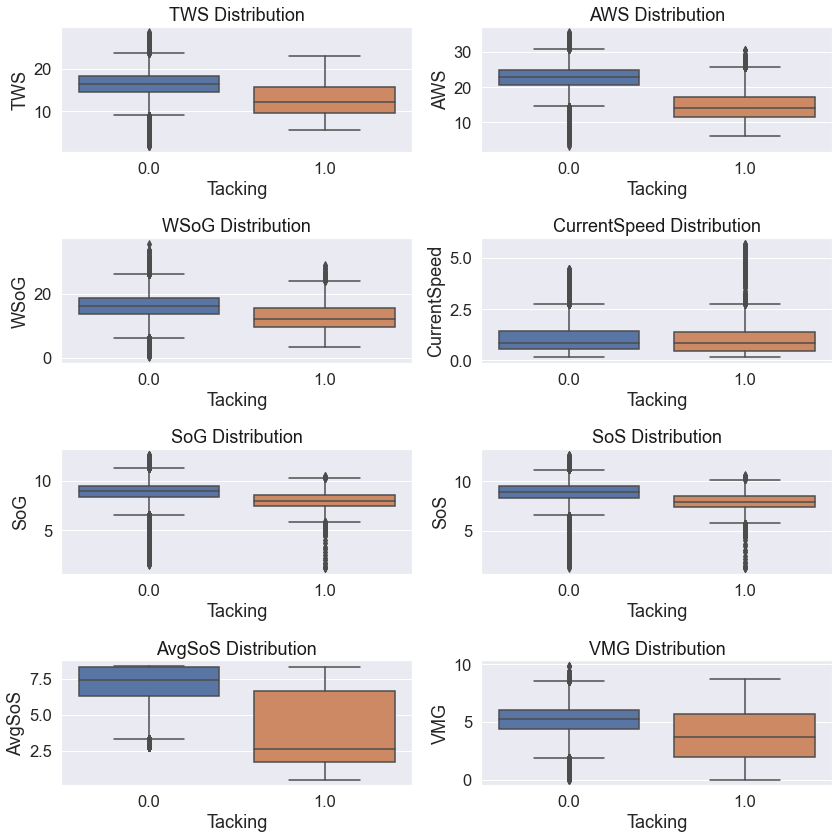

In [57]:
# Checking speed related distributions
plot_boxplots(df,wind_sp_cols+ship_sp_cols,4,2)

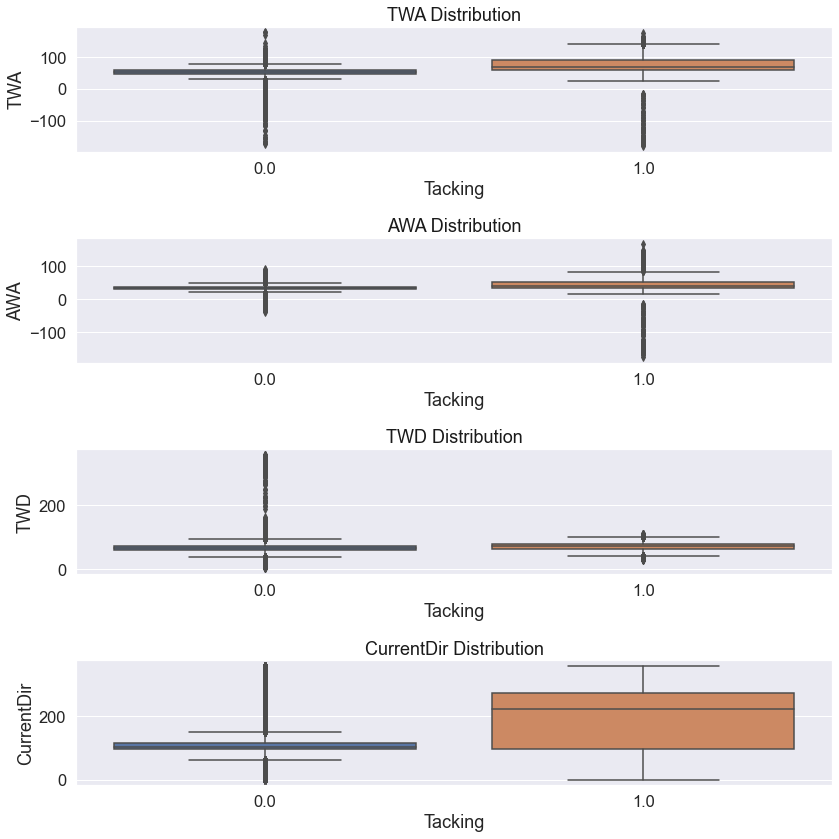

In [58]:
# Check wind/current angle/direction distributions
plot_boxplots(df,direction_cols,4,1)

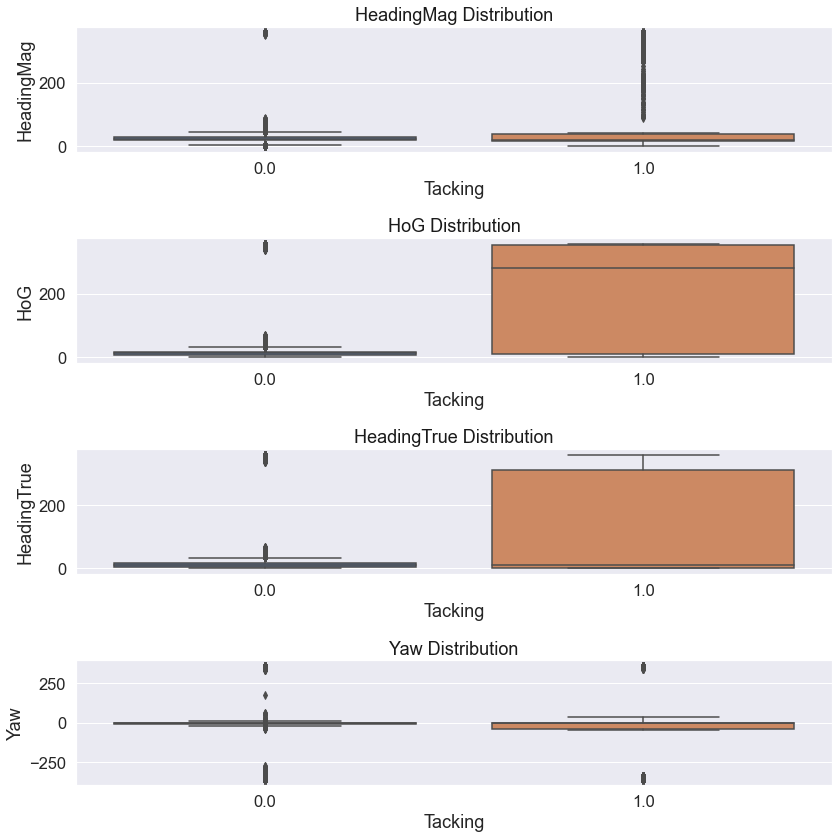

In [59]:
# Check magnetic direction distributions
plot_boxplots(df,heading_cols,4,1)

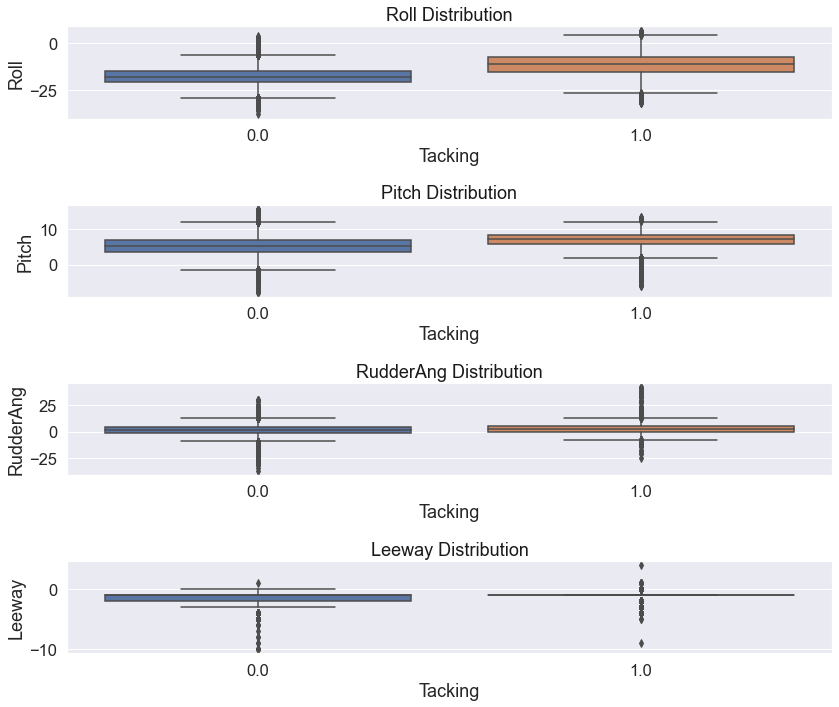

In [60]:
# Check axes/angle distributions
plot_boxplots(df,axes_cols+angle_cols,5,1)

#### Leeway

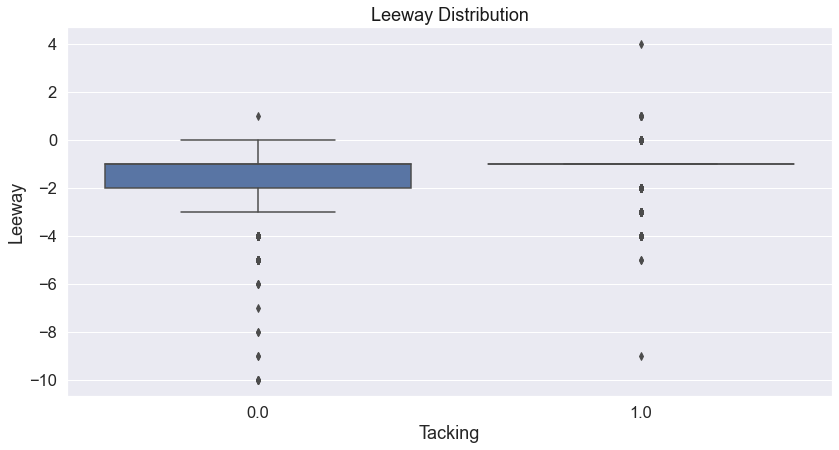

In [61]:
# Checking Leeway distributions
plot_boxplots(df,['Leeway'],2,1)

#### Voltage

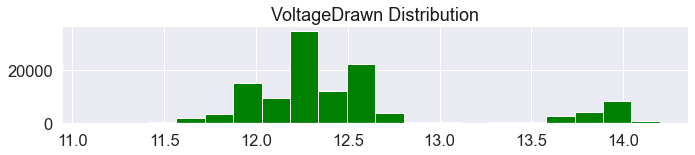

In [62]:
# Check voltage distributions
plot_histograms(df,voltgage_cols,5,1,20)

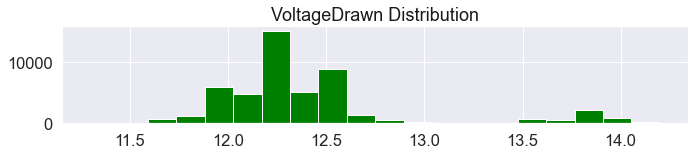

In [63]:
plot_histograms(df2,voltgage_cols,5,1,20)

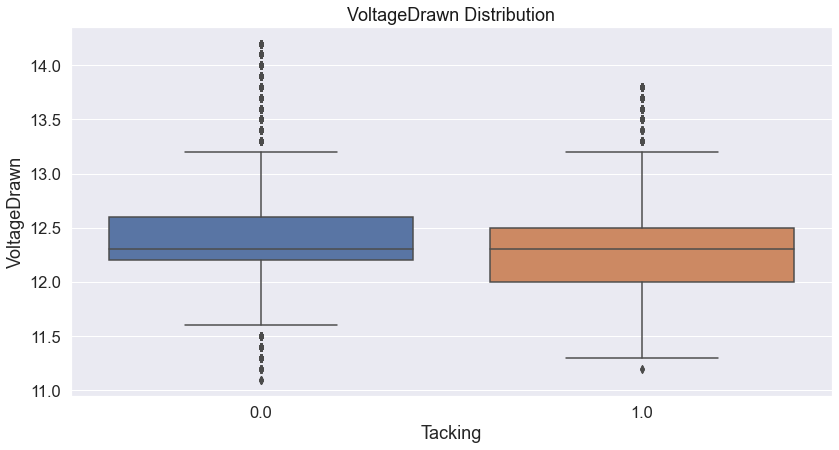

In [64]:
# Check voltage boxplot
plot_boxplots(df,voltgage_cols,2,1)

#### Temperature

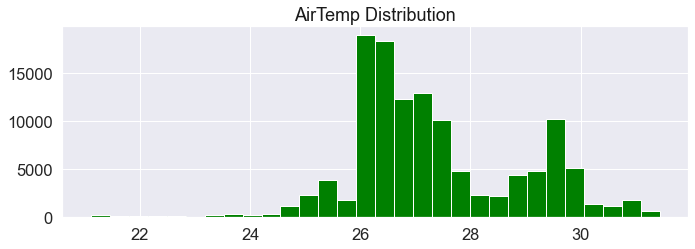

In [65]:
# Check temperature distribution
plot_histograms(df,temperature_col,3,1,30)

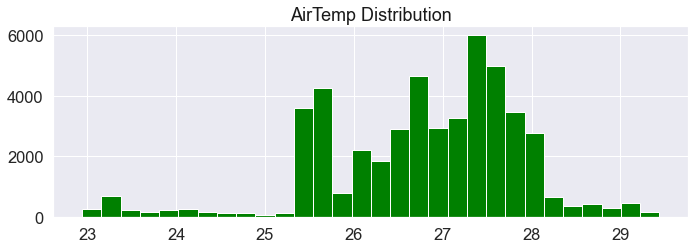

In [66]:
plot_histograms(df2,temperature_col,3,1,30)

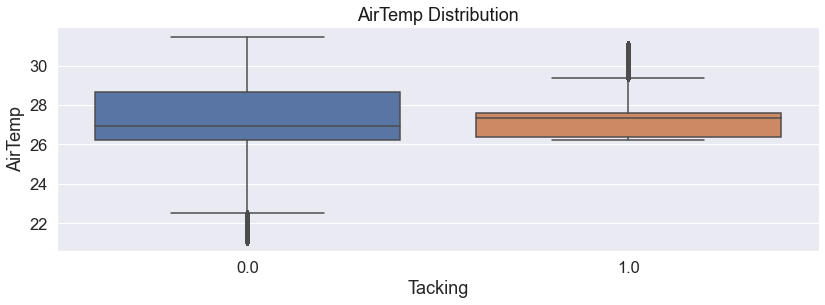

In [67]:
# Check temperature distribution
plot_boxplots(df,temperature_col,3,1)

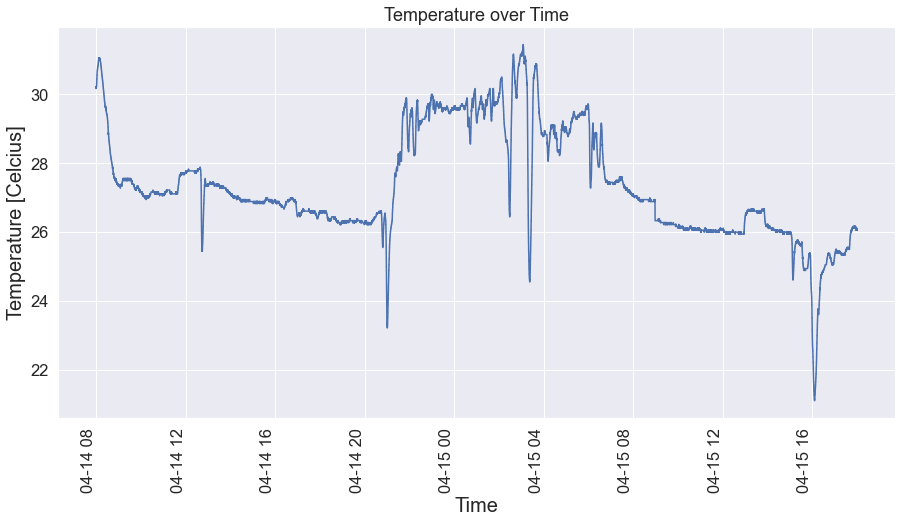

In [68]:
fig = plt.gcf()
fig.set_size_inches(15,8)

ax = df['AirTemp'].plot(color = 'b')
ax.set_title('Temperature over Time')
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('Temperature [Celcius]', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.show()

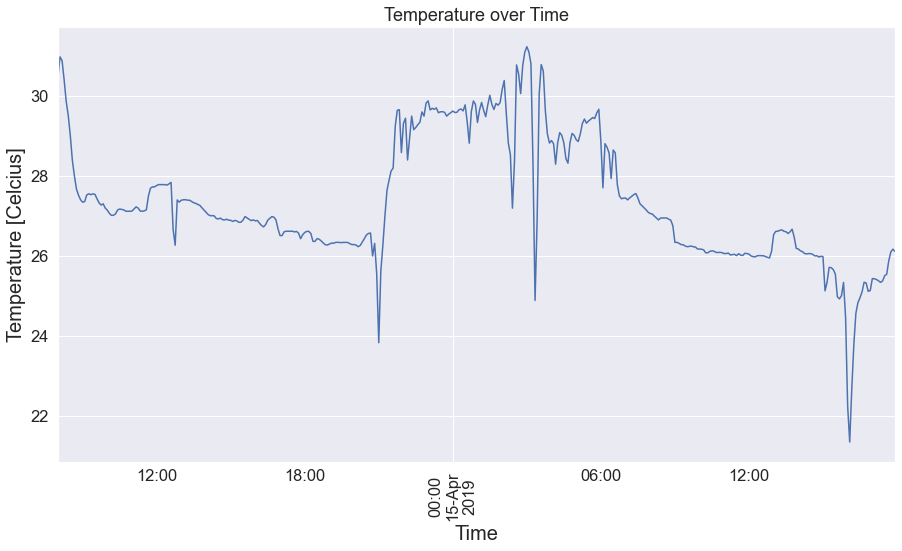

In [69]:
# Temperature Plot with Resampling 
# Some options: '#min' = '#T', 'H', 'D', 'B' (business day), 'W', 'M', 'Q', 'Y'
fig = plt.gcf()
fig.set_size_inches(15,8)

ax = df['AirTemp'].resample('5min').mean().plot(color = 'b')
ax.set_title('Temperature over Time')
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('Temperature [Celcius]', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.show()

#### Analizing Tacking Label Distribution

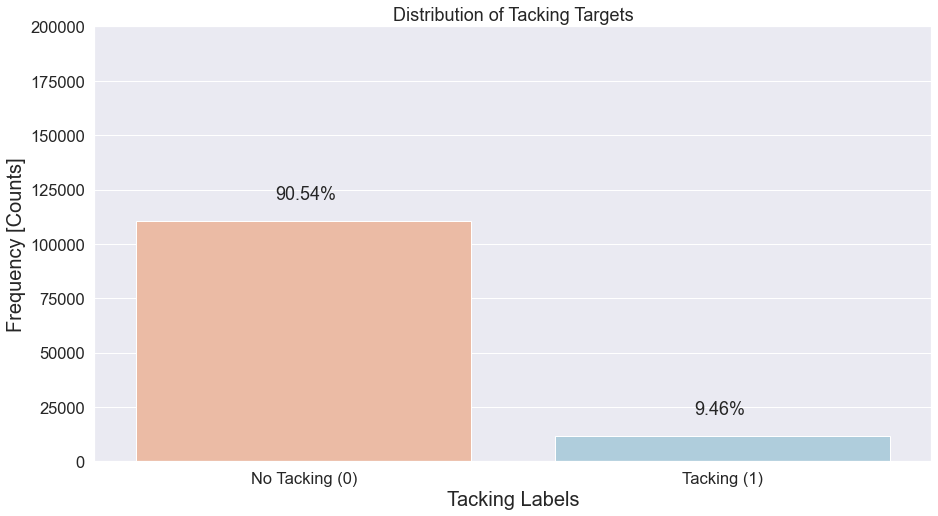

Raw value counts:


index  Tacking
Action                    
No Tacking    0.0   110677
Tacking       1.0    11563

In [70]:
# Tacking distribution plot
tacking = df['Tacking'].values
ax = sns.countplot(x = tacking ,palette="RdBu")
fig = plt.gcf()
fig.set_size_inches(15,8)

ax.set_ylim(top=200000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(tacking)), (p.get_x()+ 0.333, p.get_height()+10000))

plt.xticks([0,1], ['No Tacking (0)', 'Tacking (1)'], rotation = 'horizontal')
plt.title('Distribution of Tacking Targets')
plt.xlabel('Tacking Labels', fontsize = 20)
plt.ylabel('Frequency [Counts]', fontsize = 20)
plt.show()

# Raw value counts
print('Raw value counts:')
labels = df['Tacking'].value_counts().reset_index()
labels['Action'] = ['No Tacking', 'Tacking']
labels.set_index('Action')

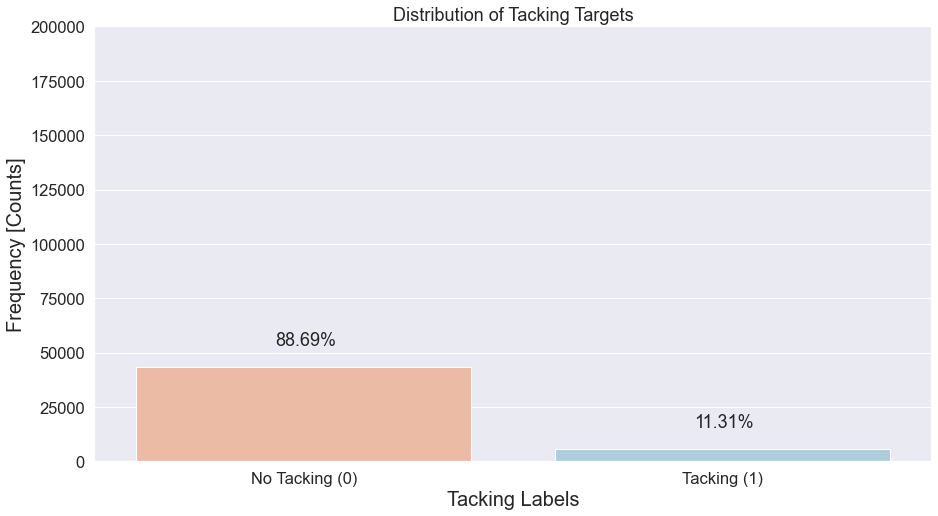

Raw value counts:


index  Tacking
Action                    
No Tacking    0.0    43279
Tacking       1.0     5520

In [71]:
# Tacking distribution plot on HOLDOUT data 
tacking = unseen_df['Tacking'].values
ax = sns.countplot(x = tacking ,palette="RdBu")
fig = plt.gcf()
fig.set_size_inches(15,8)

ax.set_ylim(top=200000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(tacking)), (p.get_x()+ 0.333, p.get_height()+10000))

plt.xticks([0,1], ['No Tacking (0)', 'Tacking (1)'], rotation = 'horizontal')
plt.title('Distribution of Tacking Targets')
plt.xlabel('Tacking Labels', fontsize = 20)
plt.ylabel('Frequency [Counts]', fontsize = 20)
plt.show()

# Raw value counts
print('Raw value counts:')
labels = unseen_df['Tacking'].value_counts().reset_index()
labels['Action'] = ['No Tacking', 'Tacking']
labels.set_index('Action')

#### Visualizing ModePilote and Tacking label over time

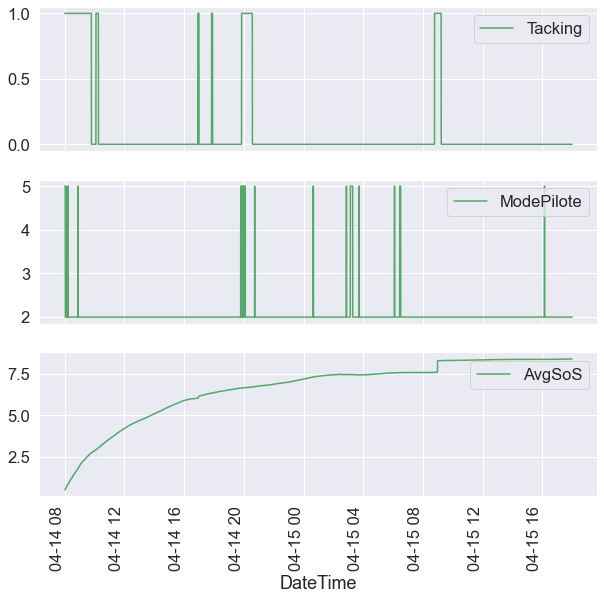

In [72]:
# Checking ModePilote and Tacking label
df[['Tacking','ModePilote' ,'AvgSoS']].plot(subplots = True, color = 'g', figsize = (10,10),label = 'best')
# plt.axis(['2019-04-15 18:00:00','2019-04-15 22:00:00', 0, 5])
plt.xticks(rotation = 'vertical')
plt.show()

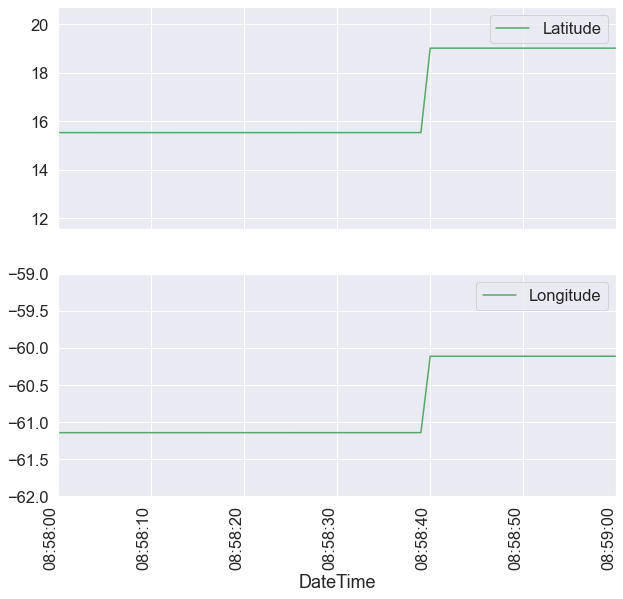

In [77]:
# Checking Latitude/Longitude
df[['Latitude','Longitude']].plot(subplots = True, color = 'g', figsize = (10,10),label = 'best')
plt.axis(['2019-04-15 08:58:00','2019-04-15 08:59:00', -62, -59])
plt.xticks(rotation = 'vertical')
plt.show()

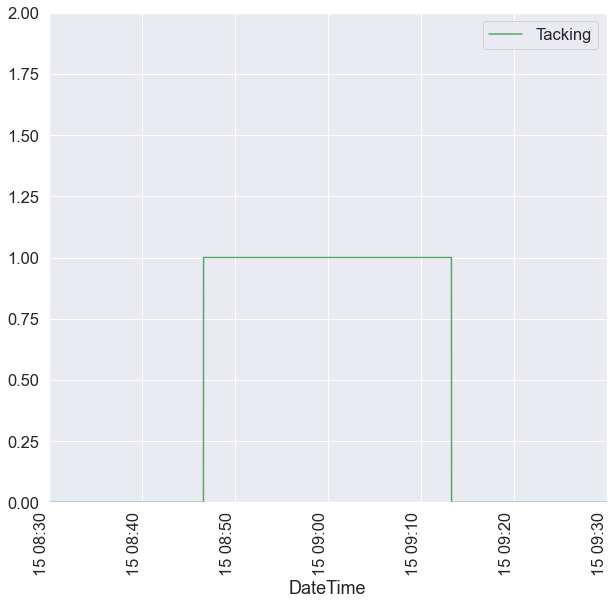

In [84]:
# Checking Tacking Resolution
df[['Tacking']].plot(subplots = True, color = 'g', figsize = (10,10),label = 'best')
plt.axis(['2019-04-15 08:30:00','2019-04-15 09:30:00', 0, 2])
plt.xticks(rotation = 'vertical')
plt.show()

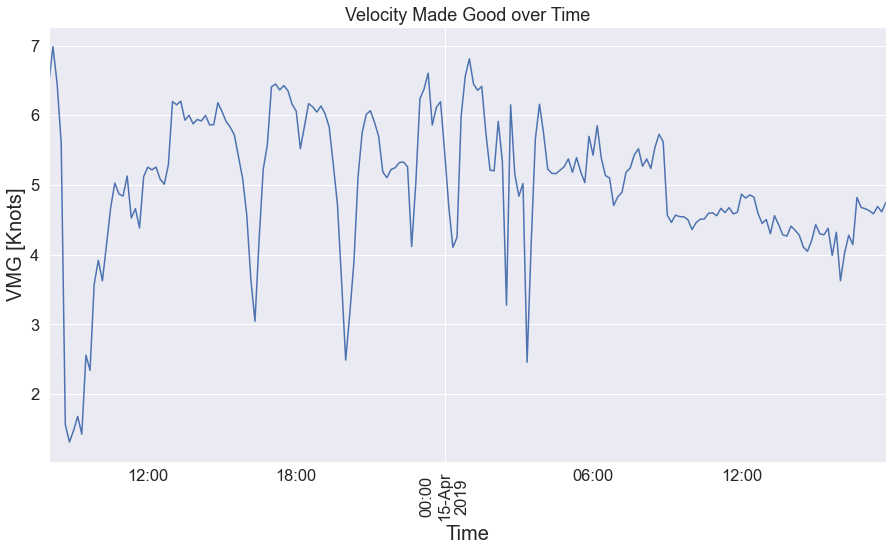

In [74]:
# Velocity Made Good  Plot with Resampling 
# Some options: '#min' = '#T', 'H', 'D', 'B' (business day), 'W', 'M', 'Q', 'Y'
fig = plt.gcf()
fig.set_size_inches(15,8)

ax = df['VMG'].resample('10min').mean().plot(color = 'b')
ax.set_title('Velocity Made Good over Time')
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('VMG [Knots]', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.show()

In [75]:
# Testing a resample
len(df['VMG'].resample('1min').mean())

2040